# Predicting antimicrobial activity for peptides with using ML methods

# About the project:


At the present, antibiotic-resistant bacteria have spread widely around the world and are currently responsible for increasing morbidity and mortality rates. Thus, in the coming decades, it may be necessary to develop new drugs that will be effective against such mutant bacteria. A possible solution is development and synthesis of peptides with antibacterial properties.The potential therapeutic applications of AMPs are significant because they have broad-spectrum antibacterial activity.

The aim of this project is to develop a model capable of predicting the activity of antimicrobial peptides against methicillin-resistant Staphylococcus aureus (MRSA). In the future, the model will be improved: it will be possible to predict the activity of peptides against a variety of bacteria, not just Staphylococcus aureus and MRSA

Data taken from the Antimicrobial Peptide Data Repository (DRAMP, http://dram.cpu-bioinfor.org/). In addition, the data were supplemented with MRSA peptides from the articles. Descriptors for peptides have been previously calculated

In [96]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import peptides
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn. model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.decomposition import TruncatedSVD
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from numpy import mean
from numpy import absolute
from numpy import sqrt
from numpy import std
import pandas as pd
import numpy as np
import re
from sklearn.inspection import permutation_importance

In [102]:
df=pd.read_csv(r'C:\Users\Elina\Desktop\Polymers\PEPT.csv')
#Remove duplicate data:
df=df.drop_duplicates(subset=['Sequence'])
#Detecting missing values:
df.isna().sum(axis = 0)

Sequence           0
Sequence_Length    0
Name               0
Activity           0
Target_Organism    0
                  ..
Z1                 0
Z2                 0
Z3                 0
Z4                 0
Z5                 0
Length: 145, dtype: int64

In [103]:
#Remove strings that have gaps:
df=df.dropna()
#I deleted the columns we won't need:
to_drop=['Methicillin-Resistant Staphylococcus aureus', 'MRSA']
df.drop(to_drop, axis=1, inplace=True)
df

Sequence  Sequence_Length  \
0                                        LNLKALLAVAKKIA               14   
1                     GFWGGLGYIAGRVGAAYGHAQASANNHHSPING               33   
2                                        WRWRCRRRFCRWRW               14   
3                           GIGGALLSAGKSALKGLAKGLAEHFAN               27   
4                                            FFFLSRIFGK               10   
...                                                 ...              ...   
2921                                             TVYTQA                6   
2922                                     INWLKLGKKMMSAI               14   
2923  YRGGYTGPIPRPPPIGRPPLRLVVCACYRLSVSDARNCCIKFGSCC...               50   
2924                                      GLFDKLKSLVSDF               13   
2925                                GTPGFQTPDARVISRFGFN               19   

                                                   Name  \
0                                   Mastoparan-C [L14A]   
1     Lactocin 705beta (lac705beta; chain b of Lacto...   
2                               WR2 (Derived from PG-1)   
3     Maximin-11 (Maximin-6; toads, amphibians, anim...   
4             Temporin-SHf (Frogs, amphibians, animals)   
...                                                 ...   
2921                        Fusaricidin D (Bacteriocin)   
2922                                   MP-5 (MP analog)   
2923  Penaeidin-1 (Pen-1; shrimps, Arthropods, animals)   
2924                           Antibacterial peptide A2   
2925                           Capistruin (Bacteriocin)   

                                               Activity  \
0     Antimicrobial, Antibacterial,Anti-Gram+, Anti-...   
1                          Antimicrobial, Antibacterial   
2     Antimicrobial, Antibacterial, Anti-Gram+, Anti...   
3              Antimicrobial, Antibacterial, Antifungal   
4     Antimicrobial, Antibacterial, Anti-Gram+, Anti...   
...                                                 ...   
2921  Antimicrobial, Antibacterial, Anti-Gram+, Anti...   
2922  Antimicrobial, Antibacterial, Anti-Gram+, Anti...   
2923  Antimicrobial, Antibacterial, Antifungal, Anti...   
2924           Antimicrobial, Antibacterial, Anti-Gram-   
2925                       Antimicrobial, Antibacterial   

                                        Target_Organism  \
0     [Ref.33285267]Gram-positive bacteria:Staphyloc...   
1     Several lactic acid bacteria, Listeria, Strept...   
2     [Ref.24621994] Gram-positive bacteria : Staphy...   
3                              Yeast: Candida albicans.   
4     Gram-positive bacterium: Staphylococcus aureus...   
...                                                 ...   
2921                                      Gram-positive   
2922  Gram-negative bacterium: Escherichia coli (MIC...   
2923  Gram-positive bacterium: Micrococcus luteus;##...   
2924  Gram-negative bacterium: Escherichia coli (MIC...   
2925               Burkholderia and Pseudomonas strains   

     Linear/Cyclic/Branched   exactmw       amw  lipinskiHBA  lipinskiHBD  \
0                    Linear  0.032742  0.199025     0.089682     0.019619   
1          Not included yet  0.155521  0.225515     0.255078     0.039494   
2                    Linear  0.033624  0.195164     0.081266     0.020166   
3          Not included yet  0.104904  0.219992     0.167998     0.054897   
4                    Linear  0.014494  0.182683     0.062947     0.011119   
...                     ...       ...       ...          ...          ...   
2921       Not included yet -0.018256  0.168458     0.025749    -0.011151   
2922       Not included yet  0.033639  0.194294     0.080153     0.015529   
2923       Not included yet  0.268636  0.241874     0.371855     0.076652   
2924       Not included yet  0.031640  0.189663     0.079205     0.017656   
2925       Not included yet  0.085512  0.201593     0.146773     0.031794   

      ...     VHSE4     VHSE5     VHSE6     VHSE7     VHSE8        Z1  \
0     ...

In [104]:
#Let's create a dataframe with patterns to search for peptides against certain bacteria
bact = pd.DataFrame({'Name': ['Staphylococcus aureus', 'MRSA', 'Bacillus subtilis','Escherichia coli','Salmonella typhimurium','Klebsiella pneumoniae'], 
                     'Pattern': ['Staphylococcus aureus|S. aureus|S.aureus','Methicillin-Resistant Staphylococcus aureus|Methicillin-resistant Staphylococcus aureus|MRSA|mrsa', 'Bacillus subtilis|B. subtilis|B. subtilis', 'Escherichia coli|E. coli|E.coli','Salmonella typhimurium|Typhimurium|typhimurium|typhimorium|S.typhimorium| S. typhimorium','Klebsiella|K. pneumoniae|K.pneumoniae']})
bact

Name                                            Pattern
0   Staphylococcus aureus           Staphylococcus aureus|S. aureus|S.aureus
1                    MRSA  Methicillin-Resistant Staphylococcus aureus|Me...
2       Bacillus subtilis          Bacillus subtilis|B. subtilis|B. subtilis
3        Escherichia coli                    Escherichia coli|E. coli|E.coli
4  Salmonella typhimurium  Salmonella typhimurium|Typhimurium|typhimurium...
5   Klebsiella pneumoniae              Klebsiella|K. pneumoniae|K.pneumoniae

In [105]:
#Identify peptides that can fight the bacteria Staphylococcus aureus, Salmonella, and others. 
#1 - yes, it can; 0 - it cannot
for name in bact['Name']:
    i=0
    df.insert (loc= 0 , column=name, value='')
    num=bact.index[bact['Name']==name].tolist()[0]
    pattern=bact.at [num, 'Pattern']
    while i<=2925:
        y=''
        x=df.iloc [i]['Target_Organism']
        y=re.findall(pattern, x)
        n=len(y)
        if n>0:
            try:
                df.at [i, name] = 1
            except:
                continue
        else:
            df.at [i, name] = 0
        i=i+1

In [106]:
df

Klebsiella pneumoniae Salmonella typhimurium Escherichia coli  \
0                        1                      0                1   
1                        0                      0                0   
2                        0                      1                1   
3                        0                      0                0   
4                        0                      0                1   
...                    ...                    ...              ...   
2921                     0                      0                0   
2922                     0                      0                1   
2923                     0                      0                1   
2924                     0                      0                1   
2925                     0                      0                0   

     Bacillus subtilis MRSA Staphylococcus aureus  \
0                    1    0                     1   
1                    0    0                     0   
2                    1    0                     1   
3                    0    0                     0   
4                    0    0                     1   
...                ...  ...                   ...   
2921                 0    0                     0   
2922                 1    0                     0   
2923                 0    0                     0   
2924                 0    0                     0   
2925                 0    0                     0   

                                               Sequence  Sequence_Length  \
0                                        LNLKALLAVAKKIA               14   
1                     GFWGGLGYIAGRVGAAYGHAQASANNHHSPING               33   
2                                        WRWRCRRRFCRWRW               14   
3                           GIGGALLSAGKSALKGLAKGLAEHFAN               27   
4                                            FFFLSRIFGK               10   
...                                                 ...              ...   
2921                                             TVYTQA                6   
2922                                     INWLKLGKKMMSAI               14   
2923  YRGGYTGPIPRPPPIGRPPLRLVVCACYRLSVSDARNCCIKFGSCC...               50   
2924                                      GLFDKLKSLVSDF               13   
2925                                GTPGFQTPDARVISRFGFN               19   

                                                   Name  \
0                                   Mastoparan-C [L14A]   
1     Lactocin 705beta (lac705beta; chain b of Lacto...   
2                               WR2 (Derived from PG-1)   
3     Maximin-11 (Maximin-6; toads, amphibians, anim...   
4             Temporin-SHf (Frogs, amphibians, animals)   
...                                                 ...   
2921                        Fusaricidin D (Bacteriocin)   
2922                                   MP-5 (MP analog)   
2923  Penaeidin-1 (Pen-1; shrimps, Arthropods, animals)   
2924                           Antibacterial peptide A2   
2925                           Capistruin (Bacteriocin)   

                                               Activity  ...     VHSE4  \
0     Antimicrobial, Antibacterial,Anti-Gram+, Anti-...  ... -0.535714   
1                          Antimicrobial, Antibacterial  ...  0.356364   
2     Antimicrobial, Antibacterial, Anti-Gram+, Anti...  ...  0.807857   
3              Antimicrobial, Antibacterial, Antifungal  ...  0.185926   
4     Antimicrobial, Antibacterial, Anti-Gram+, Anti...  ...  0.070000   
...                                                 ...  ...       ...   
2921  Antimicrobial, Antibacterial, Anti-Gram+, Anti...  ... -0.676667   
2922  Antimicrobial, Antibacterial, Anti-Gram+, Anti...  ... -0.029286   
2923  Antimicrobial, Antibacterial, Antifungal, Anti...  ...  0.044800   
2924           Antimicrobial, Antibacterial, Anti-Gram-  ... -0.122308   
2925                       Antimicrobial, Antibacterial  ...  0.141053   

         VHSE5  

In [107]:
df=df[['Staphylococcus aureus', 'MRSA', 'Bacillus subtilis','Escherichia coli','Salmonella typhimurium','Klebsiella pneumoniae','BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2', 'PP3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'KF1', 'KF2', 'KF3', 'KF4', 'KF5', 'KF6', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM1', 'MSWHIM2', 'MSWHIM3', 'E1', 'E2', 'E3', 'E4', 'E5', 'PD1', 'PD2', 'ProtFP1', 'ProtFP2', 'ProtFP3', 'ProtFP4', 'ProtFP5', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'SV1', 'SV2', 'SV3', 'SV4', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'SVGER1', 'SVGER2', 'SVGER3', 'SVGER4', 'SVGER5', 'SVGER6', 'SVGER7', 'SVGER8', 'SVGER9', 'SVGER10', 'SVGER11', 'T1', 'T2', 'T3', 'T4', 'T5', 'VHSE1', 'VHSE2', 'VHSE3', 'VHSE4', 'VHSE5', 'VHSE6', 'VHSE7', 'VHSE8', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5','Antibacterial','Antifungal','Anti-Gram+','Anti-Gram-','Antimicrobial','Antiviral','Target_Organism']]

<AxesSubplot:xlabel='count', ylabel='type'>

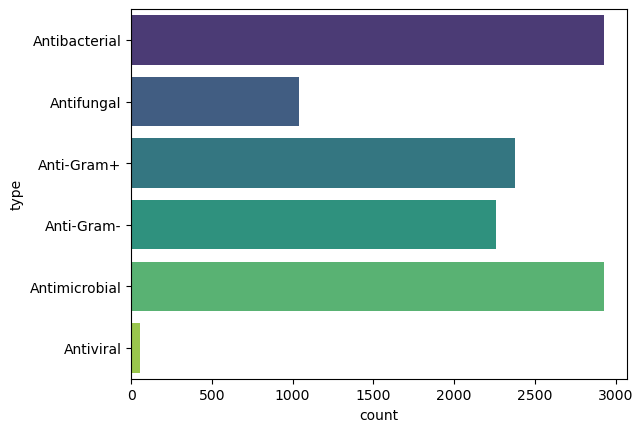

In [39]:
ty=['Antibacterial','Antifungal','Anti-Gram+','Anti-Gram-','Antimicrobial','Antiviral']
df1= pd.DataFrame(columns=['count', 'type'],index=range(0, 6))
i=0
for N in ty:
    df1.at[i,'type']=N
    count=df[N].sum(axis=0)
    df1.at[i,'count']=count
    i=i+1

import seaborn as sns
sns.barplot(x='count', y='type', data=df1, palette="viridis")

In [108]:
#Consider the distribution of MRSA/non-MRSA properties. 
#It can be seen that these properties occur in conjunction with antibacterial properties against Gram-positive bacteria.
mrsa=df.groupby(['MRSA'])['Staphylococcus aureus', 'Bacillus subtilis','Escherichia coli','Salmonella typhimurium','Klebsiella pneumoniae'].apply(sum).reset_index()
Kleb_pn=df.groupby(['Klebsiella pneumoniae'])['Staphylococcus aureus', 'MRSA', 'Bacillus subtilis','Escherichia coli','Salmonella typhimurium']. sum().reset_index()
Bacillus_s=df.groupby(['Bacillus subtilis'])['Staphylococcus aureus', 'MRSA','Escherichia coli','Salmonella typhimurium','Klebsiella pneumoniae']. sum().reset_index()
E_coli=df.groupby(['Escherichia coli'])['Staphylococcus aureus', 'MRSA', 'Bacillus subtilis','Salmonella typhimurium','Klebsiella pneumoniae']. sum().reset_index()
S_typhi=df.groupby(['Salmonella typhimurium'])['Staphylococcus aureus', 'MRSA', 'Bacillus subtilis','Escherichia coli','Klebsiella pneumoniae']. sum().reset_index()
St_aureus=df.groupby(['Staphylococcus aureus'])['MRSA', 'Bacillus subtilis','Escherichia coli','Salmonella typhimurium','Klebsiella pneumoniae']. sum().reset_index()

C:\Users\Elina\AppData\Local\Temp\ipykernel_16020\2826059692.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mrsa=df.groupby(['MRSA'])['Staphylococcus aureus', 'Bacillus subtilis','Escherichia coli','Salmonella typhimurium','Klebsiella pneumoniae'].apply(sum).reset_index()
C:\Users\Elina\AppData\Local\Temp\ipykernel_16020\2826059692.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Kleb_pn=df.groupby(['Klebsiella pneumoniae'])['Staphylococcus aureus', 'MRSA', 'Bacillus subtilis','Escherichia coli','Salmonella typhimurium']. sum().reset_index()
C:\Users\Elina\AppData\Local\Temp\ipykernel_16020\2826059692.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Bacillus_s=df.groupby(['Bacillus subtilis'])['Staphylococcus aureus', 'MRSA','Escherichi

In [109]:
D=[St_aureus, mrsa, Kleb_pn, Bacillus_s, E_coli, S_typhi, St_aureus]
for data in D:
    for col in data.columns.values.tolist()[1:]:
        data[col] = data[col] / (data[col].sum())

In [113]:
E_coli

Escherichia coli  Staphylococcus aureus      MRSA  Bacillus subtilis  \
0                 0               0.145367  0.141129           0.136691   
1                 1               0.854633  0.858871           0.863309   

   Salmonella typhimurium  Klebsiella pneumoniae  
0                0.056098               0.088154  
1                0.943902               0.911846

<AxesSubplot:xlabel='Escherichia coli'>

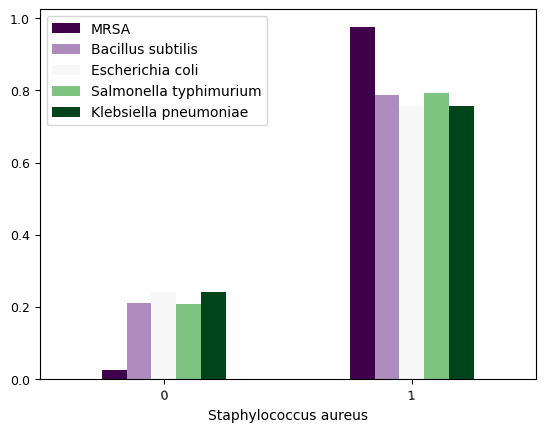

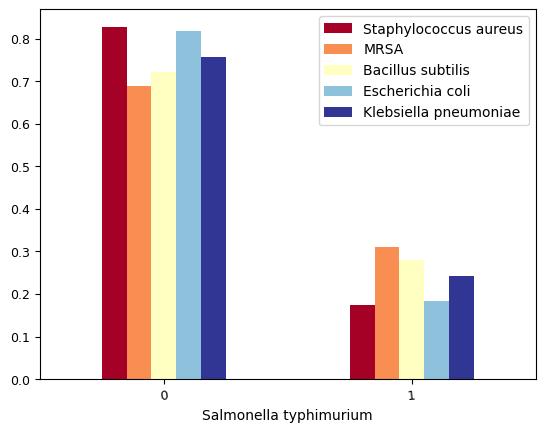

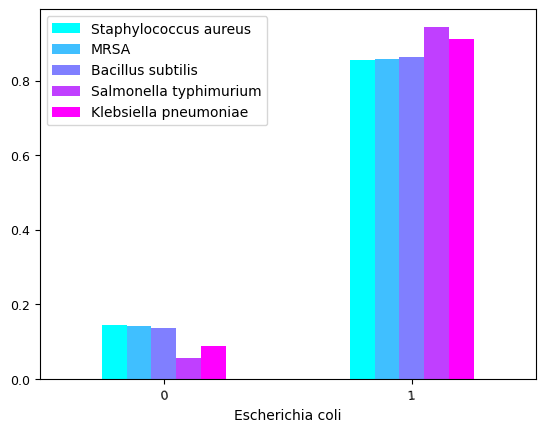

In [70]:
St_aureus.plot(x='Staphylococcus aureus', y=['MRSA', 'Bacillus subtilis','Escherichia coli','Salmonella typhimurium','Klebsiella pneumoniae'], kind="bar", rot=5, fontsize=9,colormap='PRGn')
S_typhi.plot(x='Salmonella typhimurium', y=['Staphylococcus aureus', 'MRSA', 'Bacillus subtilis','Escherichia coli','Klebsiella pneumoniae'], kind="bar", rot=5, fontsize=9, colormap='RdYlBu')
E_coli.plot(x='Escherichia coli', y=['Staphylococcus aureus', 'MRSA', 'Bacillus subtilis','Salmonella typhimurium','Klebsiella pneumoniae'], kind="bar", rot=5, fontsize=9, colormap='cool')


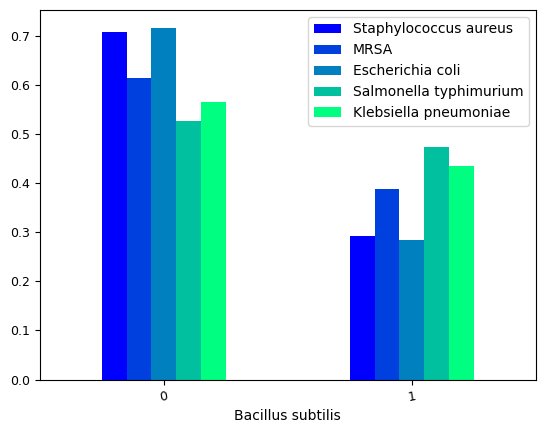

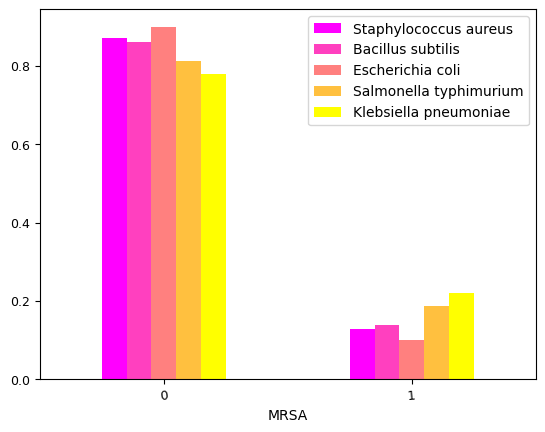

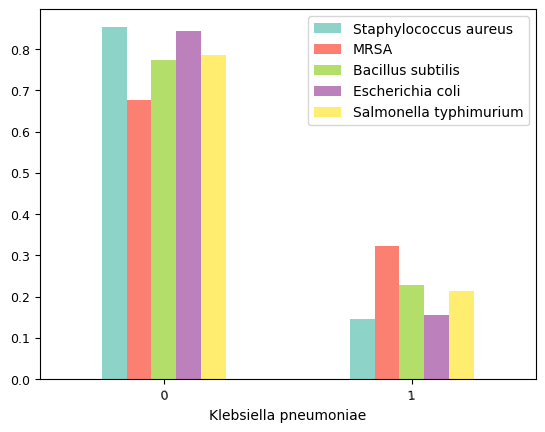

In [69]:
Bacillus_s.plot(x='Bacillus subtilis', y=['Staphylococcus aureus', 'MRSA','Escherichia coli','Salmonella typhimurium','Klebsiella pneumoniae'], kind="bar", rot=10, fontsize=9,colormap='winter')
mrsa.plot(x="MRSA", y=['Staphylococcus aureus', 'Bacillus subtilis','Escherichia coli','Salmonella typhimurium','Klebsiella pneumoniae'], kind="bar", rot=5, fontsize=9,colormap='spring')
Kleb_pn.plot(x="Klebsiella pneumoniae", y=['Staphylococcus aureus', 'MRSA', 'Bacillus subtilis','Escherichia coli','Salmonella typhimurium'], kind="bar", rot=5, fontsize=9,colormap='Set3')
plt.show()

<AxesSubplot:xlabel='count', ylabel='Bacteria'>

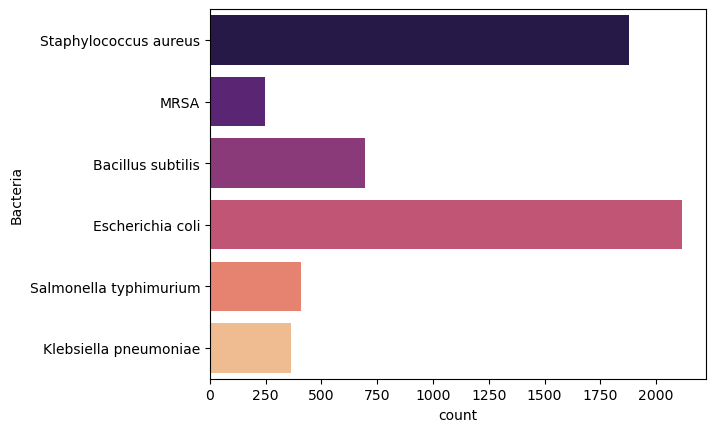

In [45]:
ty=['Staphylococcus aureus', 'MRSA', 'Bacillus subtilis','Escherichia coli','Salmonella typhimurium','Klebsiella pneumoniae']
df2= pd.DataFrame(columns=['count', 'Bacteria'],index=range(0, 6))
i=0
for N in ty:
    df2.at[i,'Bacteria']=N
    count=df[N].sum(axis=0)
    df2.at[i,'count']=count
    i=i+1

import seaborn as sns

sns.barplot(x='count',y='Bacteria', data=df2, palette="magma")

# Data normalization

In [7]:
#I deleted the columns we won't need:
to_drop=['Target_Organism', 'Antibacterial', 'Antifungal', 'Anti-Gram+', 'Anti-Gram-', 'Antimicrobial', 'Antiviral']
df.drop(to_drop, axis=1, inplace=True)

C:\Users\Elina\AppData\Local\Temp\ipykernel_17012\2581403731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(to_drop, axis=1, inplace=True)


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
df = pd.DataFrame(scaled, columns=df.columns)

# Searching for patterns in the data:

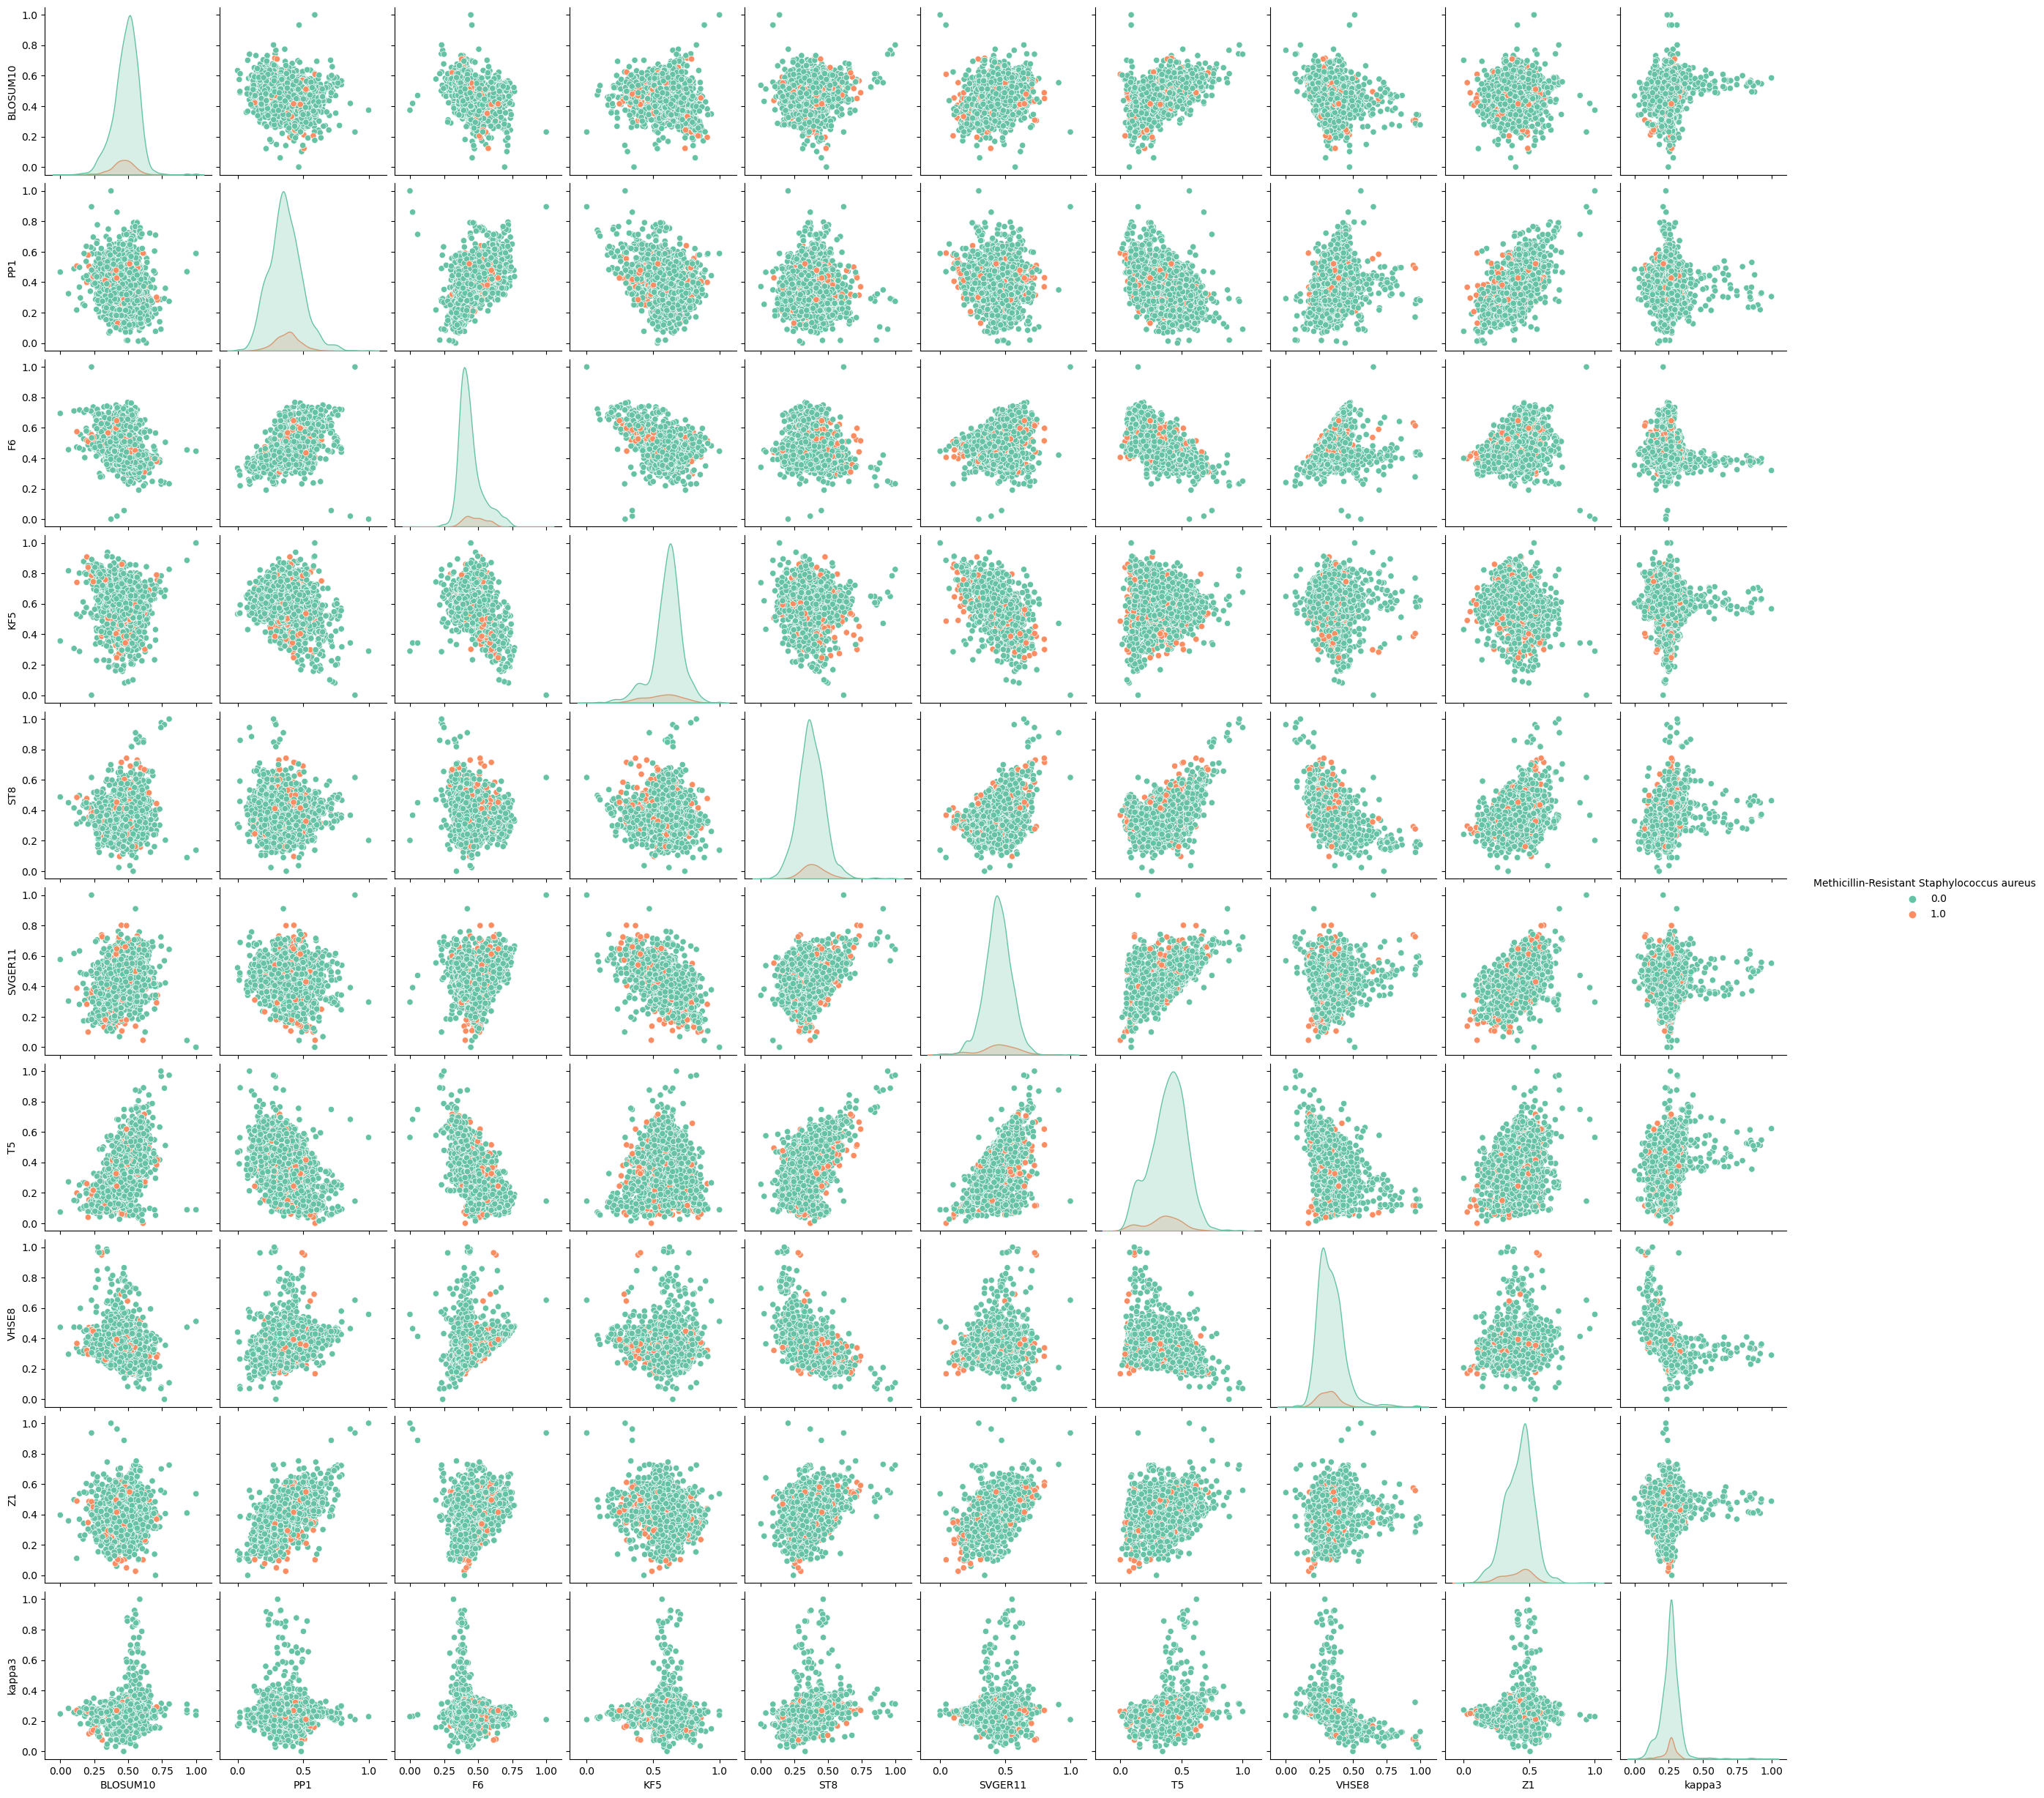

In [113]:
df3=df[['BLOSUM10', 'PP1',  'F6', 'KF5', 'ST8', 'SVGER11', 'T5', 'VHSE8', 'Z1','kappa3','MRSA']]
pl=sns.pairplot(df3, hue='MRSA', palette='Set2')
plt.show()

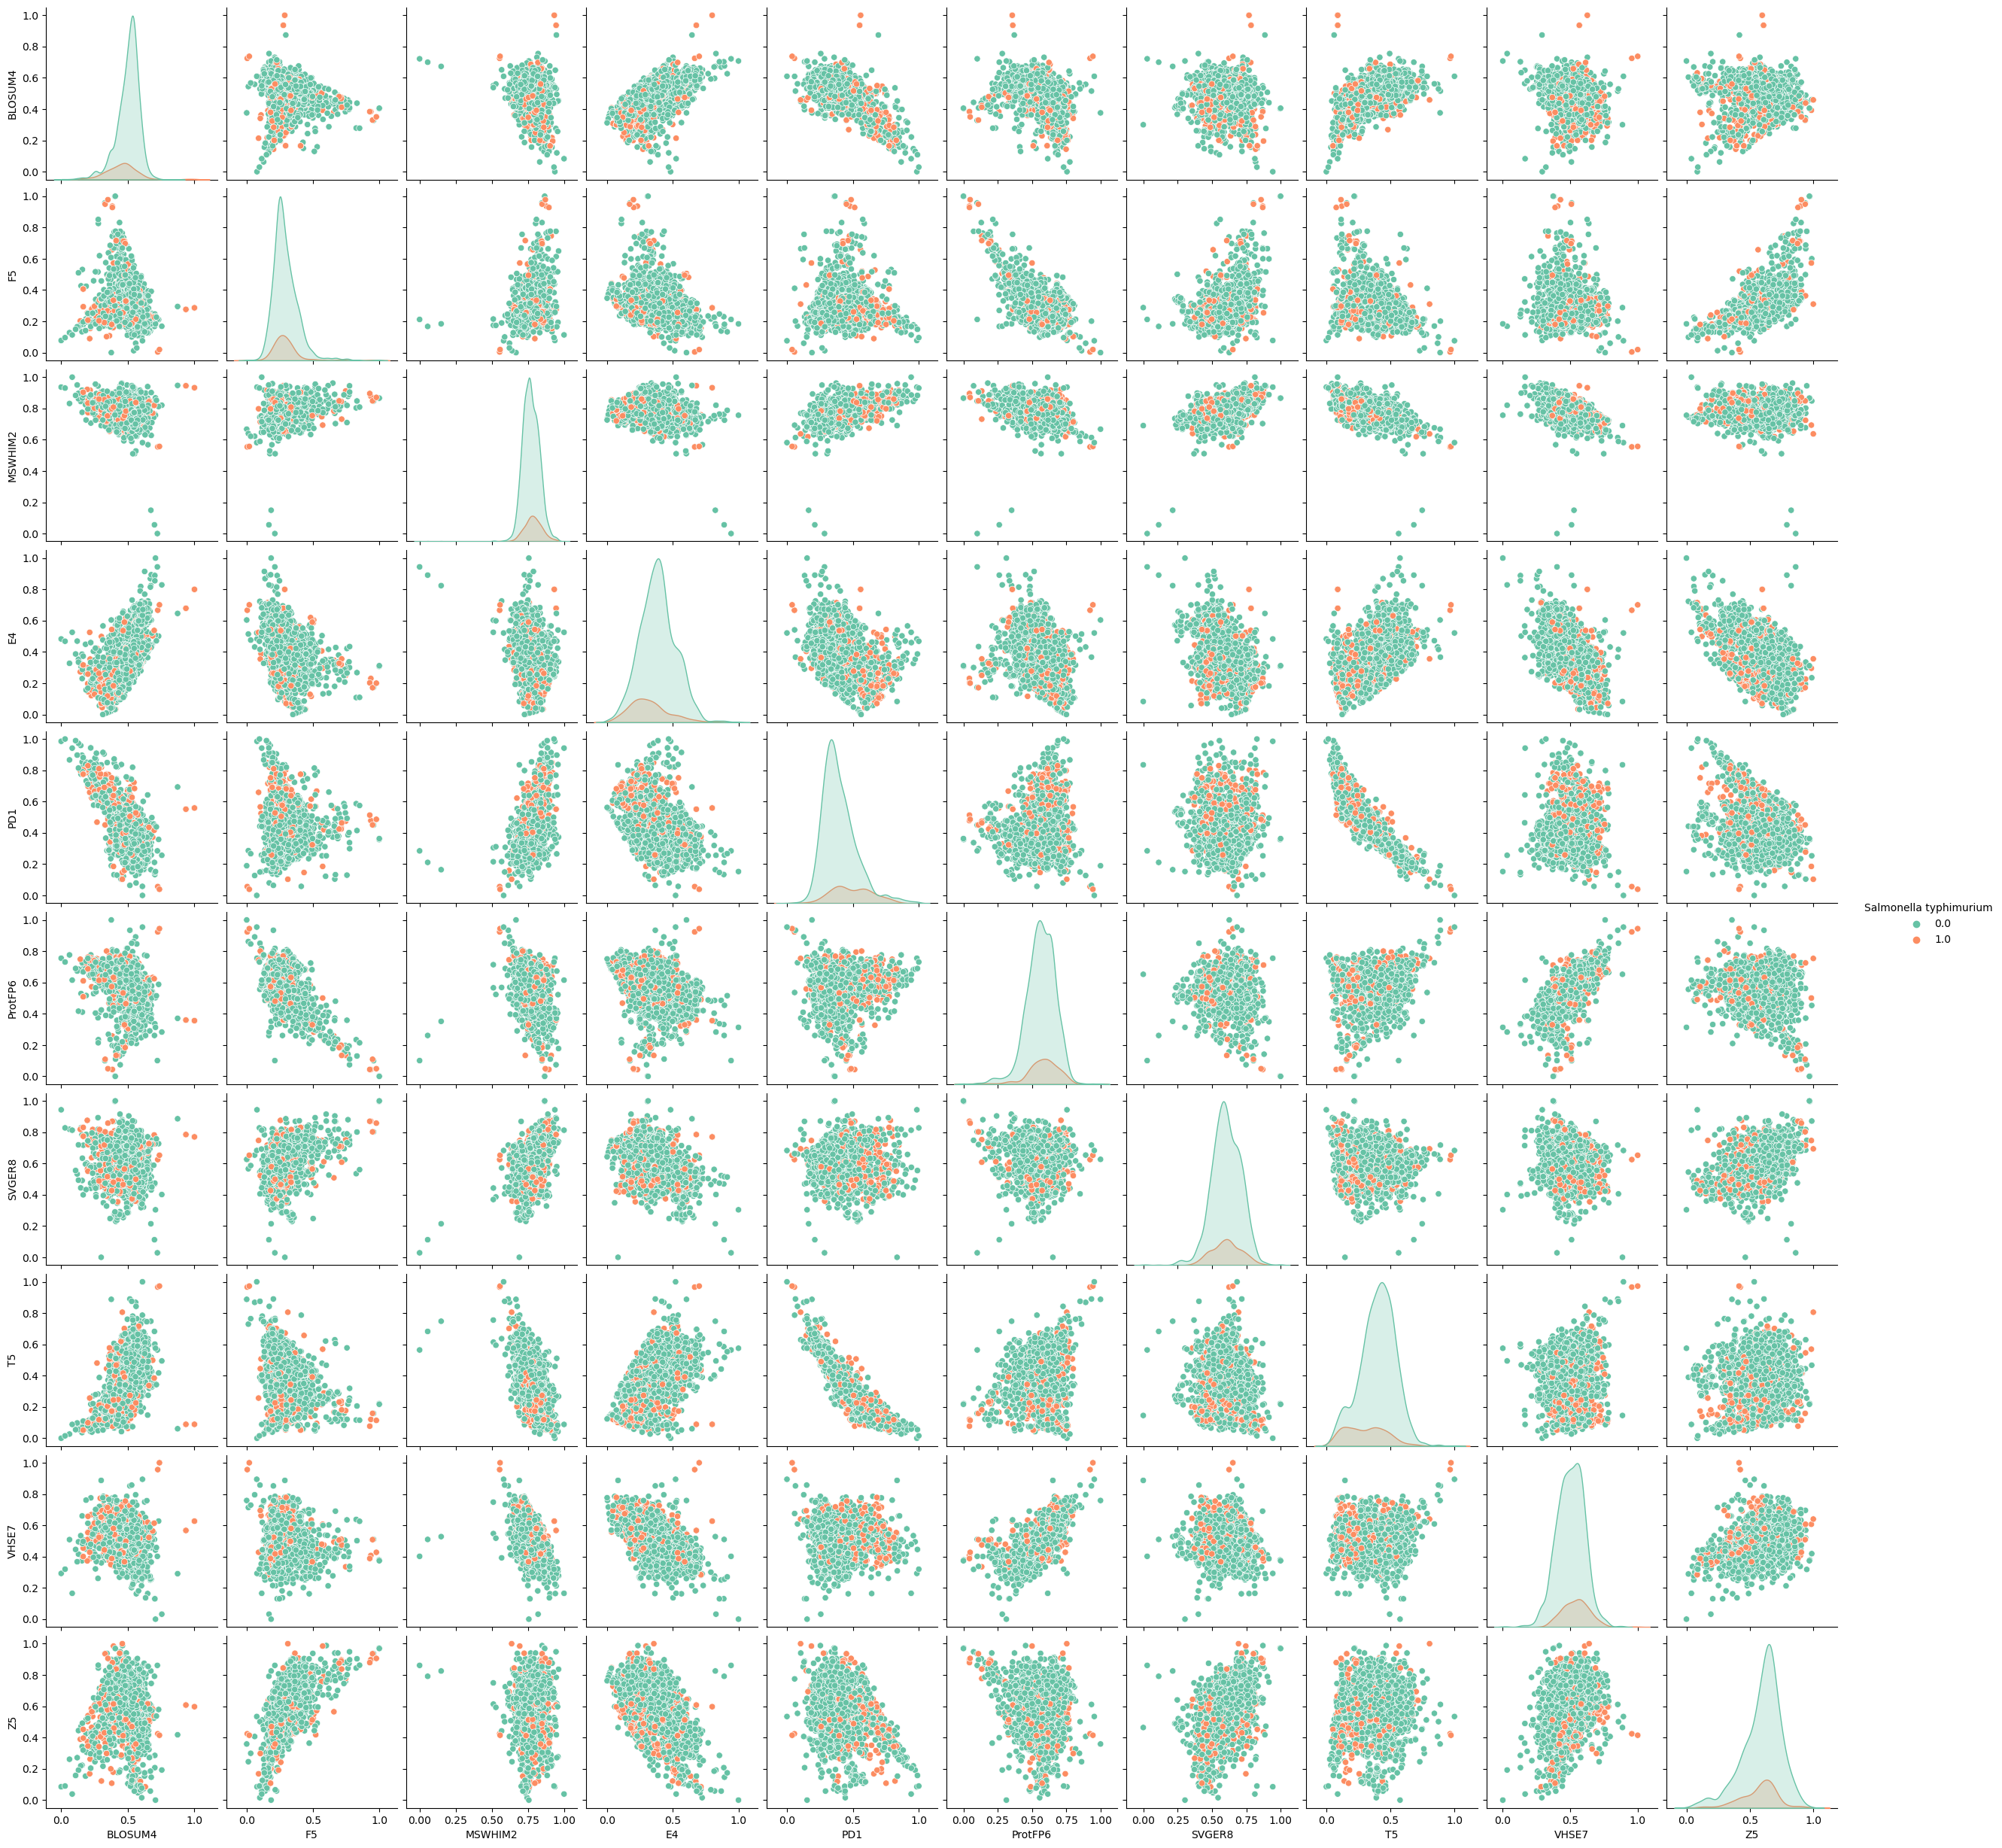

In [117]:
df2=df[['Salmonella typhimurium','BLOSUM4','F5', 'MSWHIM2', 'E4', 'PD1', 'ProtFP6', 'SVGER8', 'T5', 'VHSE7', 'Z5']]
pl=sns.pairplot(df2, hue='Salmonella typhimurium', palette='Set2')
plt.show()

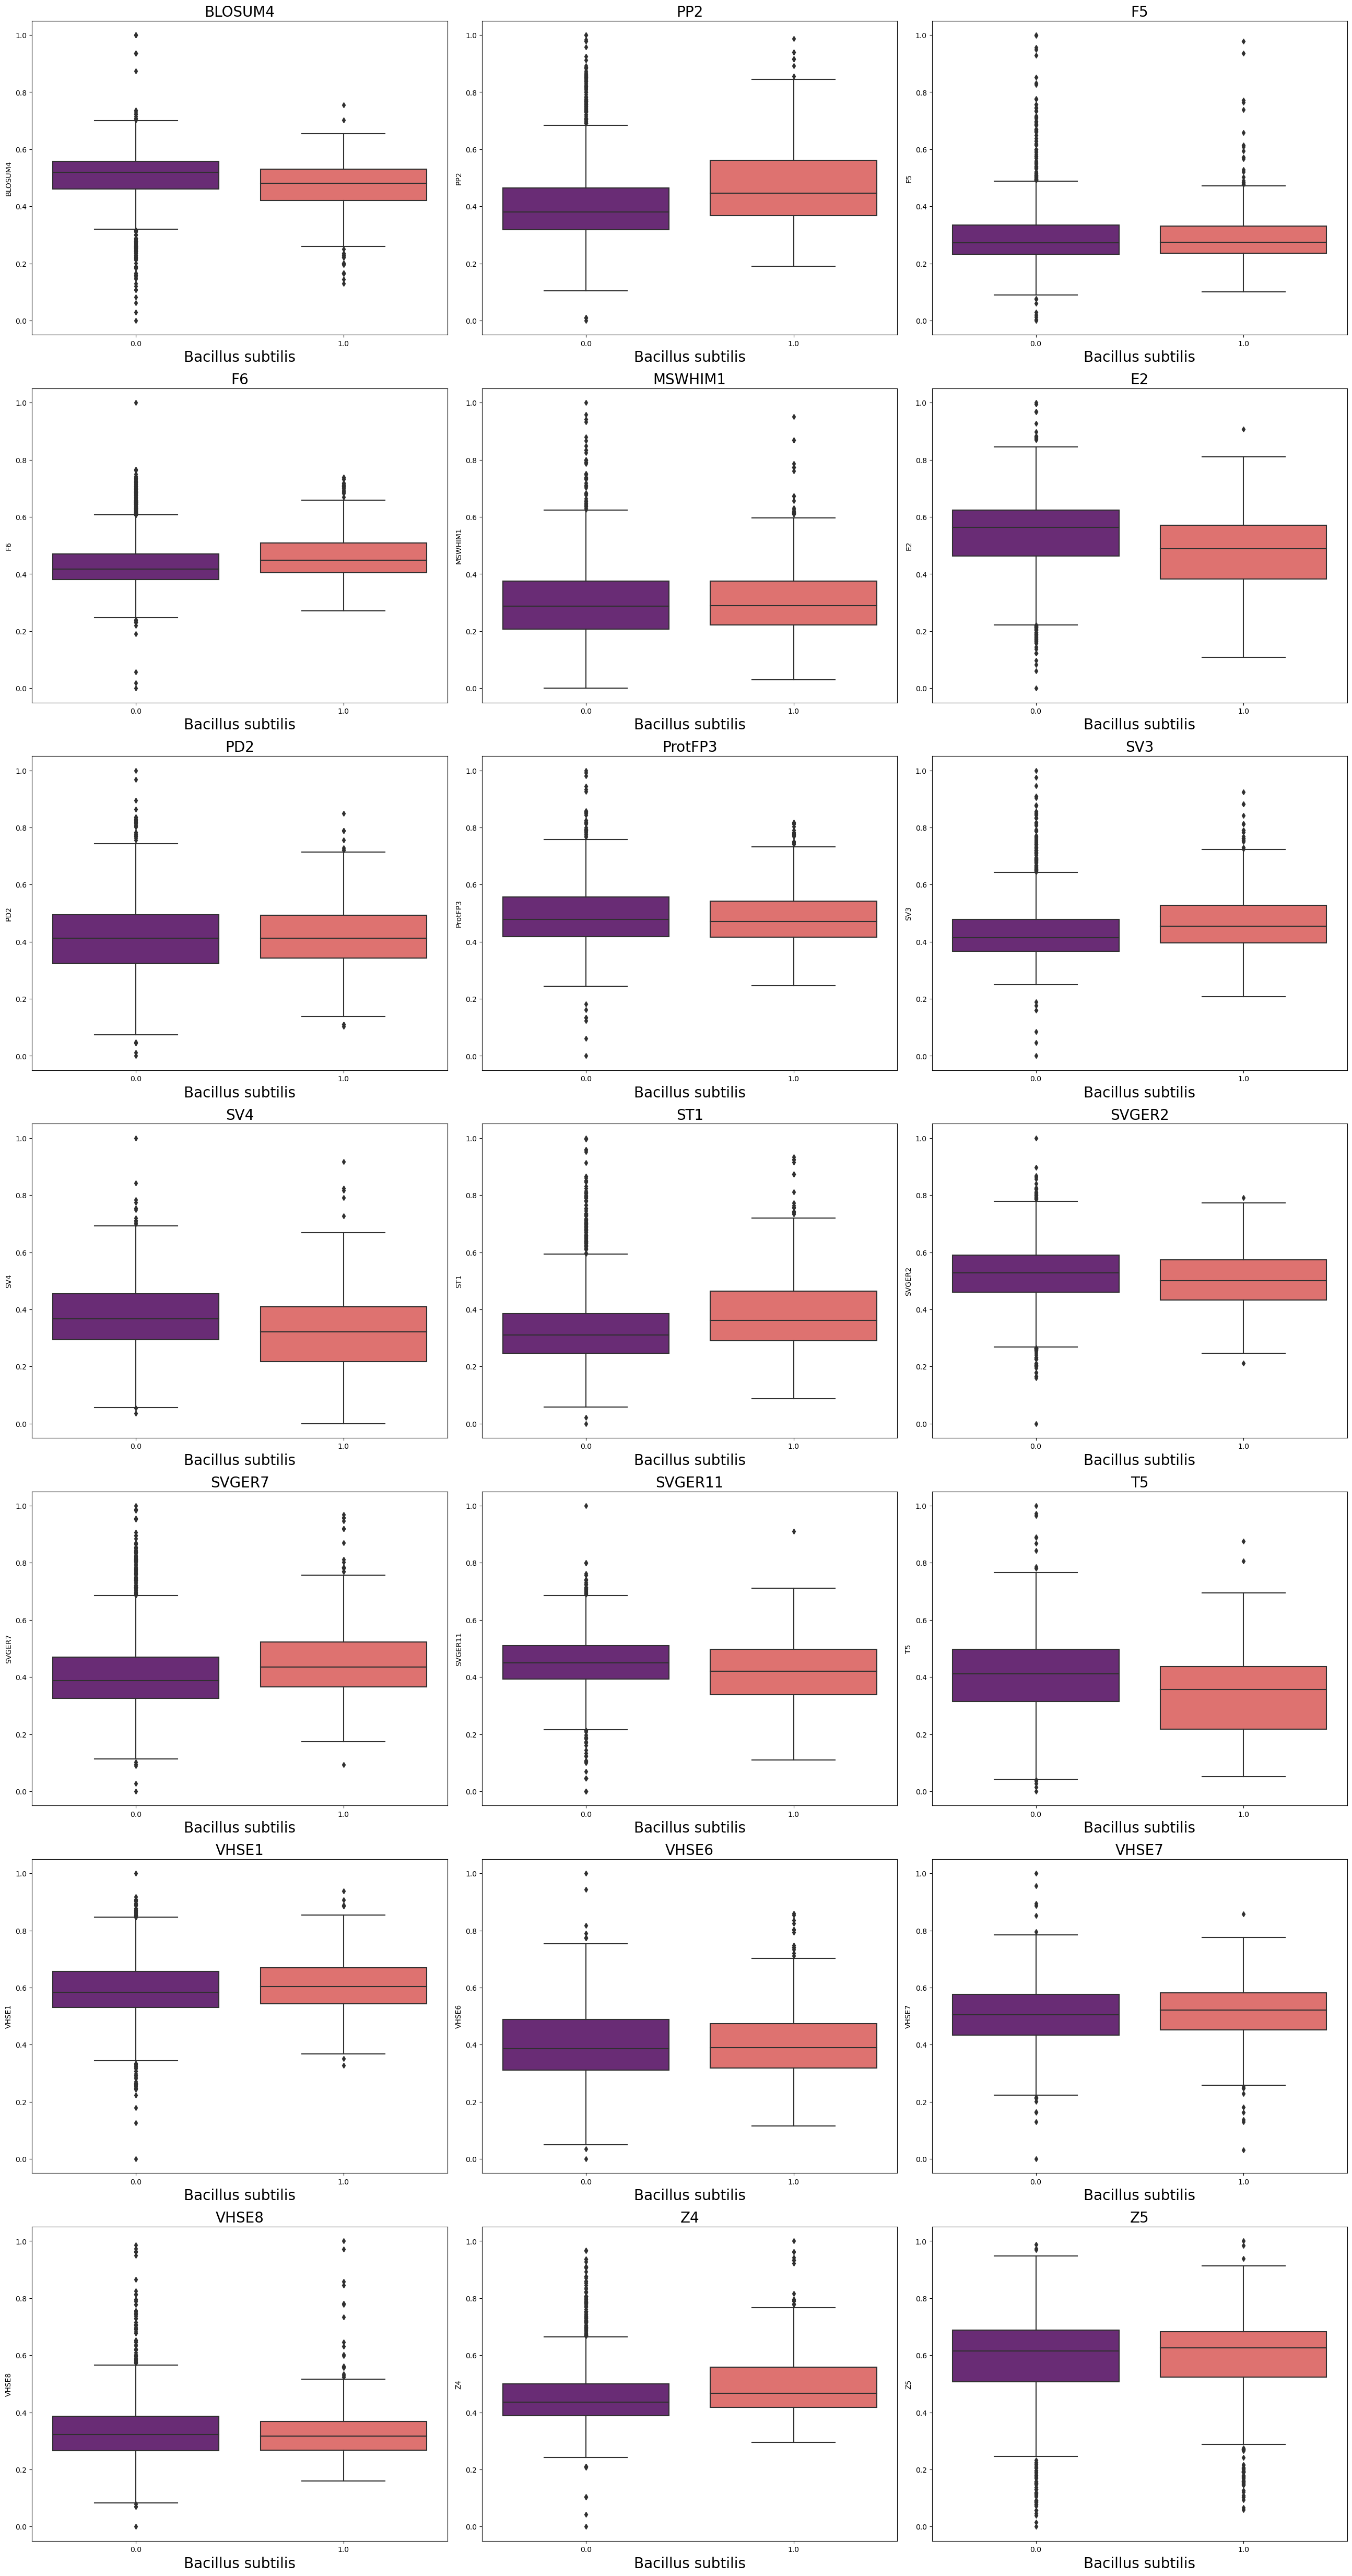

In [71]:
#Outliers detection:
a = 10  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
col=['BLOSUM4', 'PP2', 'F5', 'F6', 'MSWHIM1','E2', 'PD2', 'ProtFP3', 'SV3', 'SV4', 'ST1', 'SVGER2', 'SVGER7', 'SVGER11', 'T5', 'VHSE1', 'VHSE6', 'VHSE7', 'VHSE8', 'Z4', 'Z5']
fig = plt.figure(figsize = (26,70))
for i in col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c), fontsize=20)
    plt.xlabel(i, fontsize=20)
    sns.boxplot(data = df, x = 'Bacillus subtilis',y=i,palette="magma" )
    c = c + 1

plt.tight_layout()
plt.show()

# Correlation

Correlation, statistical technique which determines how one variables moves/changes in relation with the other variable. It gives us the idea about the degree of the relationship of the two variables.

Highly correlated features refer to variables that have a strong linear relationship with each other. When two or more variables are highly correlated, they carry almost the same information, making it redundant to include all of them in a model. This can lead to a problem known as multicollinearity where it becomes difficult to determine the independent effect of each variable on the target variable.

In [8]:
#Let's check for highly correlated features.
cor_matrix=df.corr().abs()
cor_matrix

BLOSUM1   BLOSUM2   BLOSUM3   BLOSUM4   BLOSUM5   BLOSUM6   BLOSUM7  \
BLOSUM1  1.000000  0.145888  0.186326  0.032744  0.033130  0.146151  0.002231   
BLOSUM2  0.145888  1.000000  0.006751  0.377194  0.321200  0.106202  0.071289   
BLOSUM3  0.186326  0.006751  1.000000  0.386317  0.077261  0.040659  0.048009   
BLOSUM4  0.032744  0.377194  0.386317  1.000000  0.338484  0.029982  0.003890   
BLOSUM5  0.033130  0.321200  0.077261  0.338484  1.000000  0.183153  0.189717   
...           ...       ...       ...       ...       ...       ...       ...   
Z1       0.848376  0.189859  0.363475  0.206088  0.372550  0.158974  0.130130   
Z2       0.069422  0.807421  0.381777  0.571462  0.523801  0.355957  0.230977   
Z3       0.159115  0.148050  0.806195  0.649783  0.273508  0.309532  0.162194   
Z4       0.120040  0.719657  0.272882  0.582869  0.583704  0.253766  0.154444   
Z5       0.081604  0.479884  0.389224  0.017677  0.625168  0.204995  0.287912   

          BLOSUM8   BLOSUM9  BLOSUM10  ...     VHSE4     VHSE5     VHSE6  \
BLOSUM1  0.043434  0.178408  0.068142  ...  0.438607  0.265395  0.372453   
BLOSUM2  0.021468  0.260332  0.129270  ...  0.703975  0.376597  0.615056   
BLOSUM3  0.027768  0.200030  0.384950  ...  0.296578  0.542108  0.028721   
BLOSUM4  0.033205  0.221780  0.377586  ...  0.310019  0.682159  0.128652   
BLOSUM5  0.001270  0.152345  0.294630  ...  0.418072  0.607151  0.745978   
...           ...       ...       ...  ...       ...       ...       ...   
Z1       0.011864  0.164634  0.126761  ...  0.509087  0.215758  0.644039   
Z2       0.139605  0.390098  0.430486  ...  0.471372  0.636470  0.722973   
Z3       0.158281  0.267222  0.321442  ...  0.025245  0.748603  0.011398   
Z4       0.000166  0.339234  0.306593  ...  0.466065  0.835518  0.544498   
Z5       0.068389  0.210479  0.015788  ...  0.527763  0.185495  0.685166   

            VHSE7     VHSE8        Z1        Z2        Z3        Z4        Z5  
BLOSUM1  0.316639  0.263688  0.848376  0.069422  0.159115  0.120040  0.081604  
BLOSUM2  0.022653  0.126630  0.189859  0.807421  0.148050  0.719657  0.479884  
BLOSUM3  0.330173  0.167208  0.363475  0.381777  0.806195  0.272882  0.389224  
BLOSUM4  0.314316  0.124979  0.206088  0.571462  0.649783  0.582869  0.017677  
BLOSUM5  0.047046  0.045693  0.372550  0.523801  0.273508  0.583704  0.625168  
...           ...       ...       ...       ...       ...       ...       ...  
Z1       0.098798  0.159880  1.000000  0.098955  0.251397  0.032400  0.362565  
Z2       0.068711  0.450777  0.098955  1.000000  0.402003  0.819488  0.364134  
Z3       0.586894  0.019457  0.251397  0.402003  1.000000  0.459007  0.172007  
Z4       0.115088  0.296729  0.032400  0.819488  0.459007  1.000000  0.388078  
Z5       0.385146  0.012127  0.362565  0.364134  0.172007  0.388078  1.000000  

[88 rows x 88 columns]

<AxesSubplot:>

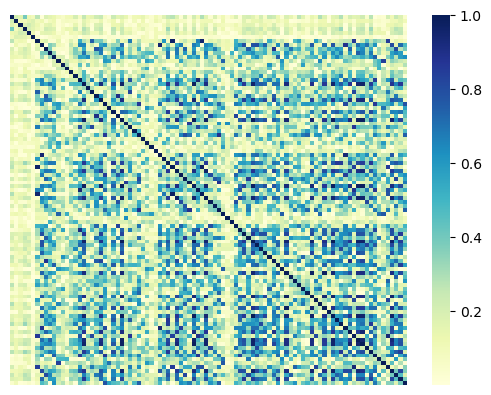

In [50]:
#Visualizing correlation matrices
sns.heatmap(cor_matrix, cmap="YlGnBu", xticklabels=False, yticklabels=False)

In [146]:
#Let's count the number of values greater than 0.6 in the correlation matrix.
count = np.count_nonzero(cor_matrix > 0.9, axis=1)
ar = pd.DataFrame(count, columns = ['Count'])
ar['Col']=''
i=0
for name in df.columns.values.tolist():
    ar.at [i, 'Col'] = name
    i=i+1

In [147]:
ar.sort_values (by = ['Count'], ascending = [ False]).head(10)

Count      Col
43     14      PD1
83     14    VHSE3
26     14      KF2
82     13    VHSE2
46     12  ProtFP2
65     12   SVGER1
76     11       T1
57     11      ST1
71     11   SVGER7
90     10       Z2

In [71]:
df

Klebsiella pneumoniae Salmonella typhimurium Escherichia coli  \
0                        1                      0                1   
1                        0                      0                0   
2                        0                      1                1   
3                        0                      0                0   
4                        0                      0                1   
...                    ...                    ...              ...   
2921                     0                      0                0   
2922                     0                      0                1   
2923                     0                      0                1   
2924                     0                      0                1   
2925                     0                      0                0   

     Bacillus subtilis MRSA Staphylococcus aureus  \
0                    1    0                     1   
1                    0    0                     0   
2                    1    0                     1   
3                    0    0                     0   
4                    0    0                     1   
...                ...  ...                   ...   
2921                 0    0                     0   
2922                 1    0                     0   
2923                 0    0                     0   
2924                 0    0                     0   
2925                 0    0                     0   

                                               Sequence  Sequence_Length  \
0                                        LNLKALLAVAKKIA               14   
1                     GFWGGLGYIAGRVGAAYGHAQASANNHHSPING               33   
2                                        WRWRCRRRFCRWRW               14   
3                           GIGGALLSAGKSALKGLAKGLAEHFAN               27   
4                                            FFFLSRIFGK               10   
...                                                 ...              ...   
2921                                             TVYTQA                6   
2922                                     INWLKLGKKMMSAI               14   
2923  YRGGYTGPIPRPPPIGRPPLRLVVCACYRLSVSDARNCCIKFGSCC...               50   
2924                                      GLFDKLKSLVSDF               13   
2925                                GTPGFQTPDARVISRFGFN               19   

                                                   Name  \
0                                   Mastoparan-C [L14A]   
1     Lactocin 705beta (lac705beta; chain b of Lacto...   
2                               WR2 (Derived from PG-1)   
3     Maximin-11 (Maximin-6; toads, amphibians, anim...   
4             Temporin-SHf (Frogs, amphibians, animals)   
...                                                 ...   
2921                        Fusaricidin D (Bacteriocin)   
2922                                   MP-5 (MP analog)   
2923  Penaeidin-1 (Pen-1; shrimps, Arthropods, animals)   
2924                           Antibacterial peptide A2   
2925                           Capistruin (Bacteriocin)   

                                               Activity  ...     VHSE4  \
0     Antimicrobial, Antibacterial,Anti-Gram+, Anti-...  ... -0.535714   
1                          Antimicrobial, Antibacterial  ...  0.356364   
2     Antimicrobial, Antibacterial, Anti-Gram+, Anti...  ...  0.807857   
3              Antimicrobial, Antibacterial, Antifungal  ...  0.185926   
4     Antimicrobial, Antibacterial, Anti-Gram+, Anti...  ...  0.070000   
...                                                 ...  ...       ...   
2921  Antimicrobial, Antibacterial, Anti-Gram+, Anti...  ... -0.676667   
2922  Antimicrobial, Antibacterial, Anti-Gram+, Anti...  ... -0.029286   
2923  Antimicrobial, Antibacterial, Antifungal, Anti...  ...  0.044800   
2924           Antimicrobial, Antibacterial, Anti-Gram-  ... -0.122308   
2925                       Antimicrobial, Antibacterial  ...  0.141053   

         VHSE5  

# Exploring Feature Importance

Let's evaluate the contribution of each descriptor to model learning and graph the ten most important ones:

In [60]:
def data(bacteria):
    global Data
    global model
    global X_train
    global y_train
    Data=df
    Data=Data.sample(frac=1)
    Data = Data[[bacteria,'BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2', 'PP3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'KF1', 'KF2', 'KF3', 'KF4', 'KF5', 'KF6', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM1', 'MSWHIM2', 'MSWHIM3', 'E1', 'E2', 'E3', 'E4', 'E5', 'PD1', 'PD2', 'ProtFP1', 'ProtFP2', 'ProtFP3', 'ProtFP4', 'ProtFP5', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'SV1', 'SV2', 'SV3', 'SV4', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'SVGER1', 'SVGER2', 'SVGER3', 'SVGER4', 'SVGER5', 'SVGER6', 'SVGER7', 'SVGER8', 'SVGER9', 'SVGER10', 'SVGER11', 'T1', 'T2', 'T3', 'T4', 'T5', 'VHSE1', 'VHSE2', 'VHSE3', 'VHSE4', 'VHSE5', 'VHSE6', 'VHSE7', 'VHSE8', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5']]
    shuffled=Data.sample(frac=1)
    pos=shuffled.loc[Data[bacteria] == 1]
    neg=shuffled.loc[Data[bacteria] == 0]
    if len(pos)>len(neg):
        count=len(neg)
    else:
        count=len(pos)
    neg=shuffled.loc[Data[bacteria] == 0].head(count)
    pos=shuffled.loc[Data[bacteria] == 1].head(count)
    Data=pd.concat([pos,neg],sort=False, axis=0)
    
    Data=Data.sample(frac=1)
    X = Data.drop(bacteria, axis = 1) # Dropping our target column
    y = Data[bacteria] # Extracting the GOx REA column
    y=y.astype('int')
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42) # Splitting our data into test and training set, where 80% of data goes to training and 20% to test (test_size). RNG seed 42 is given as argument to ensure reproducibility.
    scaler =MinMaxScaler() #Instantiating scaler to prepare our final data to use during model development
    X_train = scaler.fit_transform(X_train_raw) # fitting the scaler and transforming our train data using .fit_transform
    X_test = scaler.transform(X_test_raw) #Using .transform to scale our test data with the settings obtained from fitting the training data 
    params = {'C': [0.5, 1, 10, 20], 
              'gamma': [1, 0.75, 0.5, 0.25], 
              'kernel': ['poly','sigmoid','rbf']} 
    clf = GridSearchCV(
        estimator=SVC(),
        param_grid=params,
        cv=5,
        n_jobs=5,
        verbose=1)
    clf.fit(X_train, y_train)
    model = SVC(kernel=dict(clf.best_params_)['kernel'], degree=3, gamma=dict(clf.best_params_)['gamma'], C=dict(clf.best_params_)['C'])
    model.fit(X_train, y_train)
    return Data

In [61]:
def feature_imp(Data, scaler):
    global sorted_idx
    global col
    global features
    global perm_importance
    cor_matrix=Data.corr().abs()
    perm_importance = permutation_importance(model, X_train, y_train)
    feature_names = Data.columns.values.tolist()
    features = np.array(feature_names)
    sorted_idx = perm_importance.importances_mean.argsort()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
    descr=[]
    for ind in sorted_idx[-40:]:
        descr.append(feature_names[ind]) 
    to_drop=list(set(to_drop) - set(descr))
    Data.drop(to_drop, axis=1, inplace=True)
    col=sorted_idx[-10:]
    fig = plt.figure(figsize = (8,10))
    plt.barh(features[col], perm_importance.importances_mean[col], color = 'mediumpurple')
    plt.xlabel("Permutation Importance")
    return sorted_idx
    return Data

In [72]:
bacteria='Staphylococcus aureus'
#bacteria='MRSA'
#bacteria='Bacillus subtilis'
#bacteria='Escherichia coli'
#bacteria='Salmonella typhimurium'
#bacteria='Klebsiella pneumoniae'

In [73]:
data(bacteria)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Staphylococcus aureus   BLOSUM1   BLOSUM2   BLOSUM3   BLOSUM4   BLOSUM5  \
461                      0  0.385283  0.380943  0.563019  0.240943 -0.169811   
1226                     0  0.000769 -0.093077 -0.426923 -0.453077  0.249231   
1276                     0 -0.255000  0.068571 -0.231429 -0.151429 -0.083571   
1057                     0  0.741786  0.620357  0.924643  0.530714 -0.277500   
206                      1  0.125143 -0.231143 -0.211714 -0.173429  0.116571   
...                    ...       ...       ...       ...       ...       ...   
1992                     0  0.183750 -0.165250  0.450000  0.062500  0.517750   
981                      1  0.172439 -0.061707  0.228537 -0.138293  0.320244   
39                       1 -0.486667 -0.689167 -0.384167 -0.004167  0.484167   
771                      1  0.278571 -0.072143 -0.453571 -0.642857  0.389286   
700                      1 -0.260000 -0.576875 -0.295000 -0.021250  0.054375   

       BLOSUM6   BLOSUM7   BLOSUM8   BLOSUM9  ...     VHSE4     VHSE5  \
461   0.547925  0.721509  0.374717  0.044717  ...  1.188302  0.009434   
1226  0.030769  0.227692  0.056154  0.032308  ...  0.081538  0.883846   
1276  0.210000  0.311429  0.197143  0.051429  ...  0.340714  0.510714   
1057  0.564643  1.018214  0.558571 -0.022143  ...  1.627500 -0.195000   
206   0.247714  0.222000  0.067714  0.383143  ... -0.049143  0.342857   
...        ...       ...       ...       ...  ...       ...       ...   
1992  0.117250  0.110250  0.094250  0.170750  ...  0.393750  0.078250   
981  -0.194390  0.070244 -0.074634 -0.041951  ...  0.299024  0.244390   
39    0.006667  0.086667  0.174167 -0.104167  ... -0.455833  0.640000   
771  -0.242857  0.497143  0.018571 -0.319286  ...  0.527857  0.873571   
700   0.316250  0.078750 -0.396875  0.132500  ... -0.645000  0.240000   

         VHSE6     VHSE7     VHSE8        Z1        Z2        Z3        Z4  \
461  -0.265283  0.939811 -0.486415  0.985660 -1.172453 -0.013774  0.137358   
1226 -0.082308  0.516154  0.256154 -0.450769  0.586923 -1.367692  0.929231   
1276 -0.286429  0.376429 -0.090000 -1.294286 -0.030714 -0.545000  0.358571   
1057 -0.426071  1.595357 -0.742143  2.006071 -2.110714  0.333929  0.559286   
206  -0.279143  0.435143 -0.317714  0.038286 -0.720571 -0.691714 -0.069429   
...        ...       ...       ...       ...       ...       ...       ...   
1992  0.170750  0.006000 -0.361750  1.103000 -0.885750  0.395500 -0.307000   
981   0.245366 -0.020488  0.328537  0.499024  0.277561  0.254146  0.349024   
39   -0.042500  0.085000  0.164167 -0.339167 -0.501667 -1.335833  0.280833   
771   0.145000  0.554286  0.984286  0.175714  1.310714 -1.632857  1.236429   
700  -0.461875  0.013125 -0.185000 -0.860625 -1.086875 -0.808125 -0.516250   

            Z5  
461  -0.188113  
1226  0.257692  
1276  0.180000  
1057 -0.284643  
206   0.304857  
...        ...  
1992 -0.374250  
981  -0.119024  
39   -0.390000  
771   0.410000  
700   0.437500  

[2096 rows x 89 columns]

array([54, 42,  1, 76, 48, 29, 79,  6, 33, 41, 15, 14, 40, 10, 44,  3, 84,
       20, 17, 18, 19, 32, 31, 78, 51, 12, 71, 73, 52, 66, 38, 30, 37, 39,
       21, 62, 57, 47, 49, 27, 34, 43, 63,  4, 77, 55, 58, 86, 80, 64, 70,
       82, 83,  0, 22, 81, 65, 26, 36, 35,  8, 75, 59, 56, 74, 11, 72, 46,
       67, 69,  2, 53, 60, 16, 24,  9, 68, 45,  5, 13,  7, 85, 61, 25, 87,
       23, 50, 28], dtype=int64)

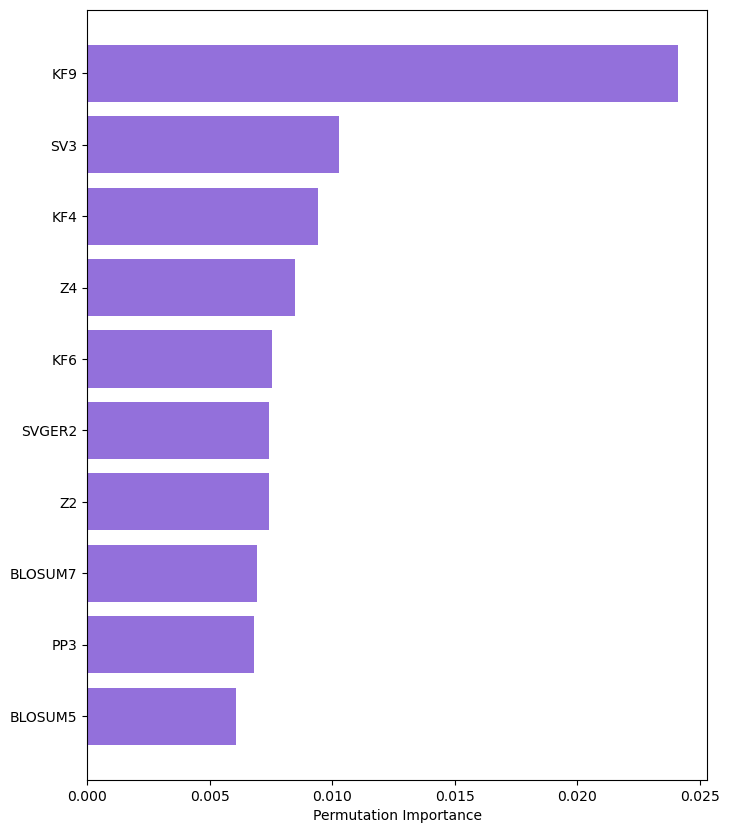

In [74]:
feature_imp(Data, scaler)

In [75]:
features[28]

'KF9'

In [67]:
#bacteria='Staphylococcus aureus'
bacteria='MRSA'
#bacteria='Bacillus subtilis'
#bacteria='Escherichia coli'
#bacteria='Salmonella typhimurium'
#bacteria='Klebsiella pneumoniae'

'MRSA'

In [62]:
data(bacteria)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


MRSA   BLOSUM1   BLOSUM2   BLOSUM3   BLOSUM4   BLOSUM5   BLOSUM6  \
2542    1  0.137273 -0.043030 -0.167273  0.149394  0.354848 -0.136364   
1040    0 -0.175833 -0.426250 -0.070000  0.064167  0.062917 -0.025000   
107     1 -0.410769 -0.207692 -0.459231 -0.074615  0.140000  0.312308   
2328    1  0.146765 -0.094412 -0.447059 -0.255000  0.152941  0.098824   
704     0 -0.063125 -0.419375 -0.598125 -0.432500  0.332500  0.267500   
...   ...       ...       ...       ...       ...       ...       ...   
2052    1 -0.103636  0.783636 -0.173636 -0.790000  0.380000  0.172727   
2449    0  0.238553 -0.175132 -0.000658  0.026053  0.151711  0.130132   
114     0  0.080789  0.068158  0.393684  0.242105  0.425789 -0.083421   
1830    1 -0.420000 -0.111538 -0.146154 -0.192308  0.050769  0.384615   
850     0 -0.152353 -0.434706 -0.041765  0.025294  0.292353 -0.032353   

       BLOSUM7   BLOSUM8   BLOSUM9  ...     VHSE4     VHSE5     VHSE6  \
2542 -0.038182 -0.008788  0.177273  ... -0.052121  0.093030  0.342727   
1040  0.127500  0.077500  0.367083  ... -0.389583  0.050417 -0.367083   
107   0.264615  0.200769  0.014615  ... -0.076154  0.460769 -0.310000   
2328  0.214412  0.065882  0.179118  ...  0.111471  0.702647  0.051176   
704   0.216250  0.178125 -0.015625  ...  0.045000  0.685000 -0.452500   
...        ...       ...       ...  ...       ...       ...       ...   
2052 -0.036364 -0.020000  0.080909  ...  0.611818  1.144545  0.380909   
2449  0.062895  0.030789  0.081184  ...  0.143947  0.033289 -0.037632   
114   0.239211  0.126842 -0.076842  ...  0.588158  0.234474  0.284737   
1830  0.266923  0.215385 -0.027692  ...  0.071538  0.339231 -0.545385   
850   0.181176  0.056471  0.228235  ... -0.259412  0.430000 -0.134118   

         VHSE7     VHSE8        Z1        Z2        Z3        Z4        Z5  
2542 -0.193939  0.003636  0.511515  0.009697  0.436364  0.269697 -0.066364  
1040  0.030000 -0.080417 -0.378333 -0.957917  0.137500 -0.034167  0.004583  
107   0.256154 -0.173846 -1.112308 -0.143077 -1.288462  0.070000  0.220769  
2328  0.465000  0.238824  0.028824  0.324412 -1.109706  0.507647  0.185882  
704   0.781875 -0.361875 -0.761250 -0.602500 -1.615625  0.100000  0.582500  
...        ...       ...       ...       ...       ...       ...       ...  
2052  0.371818 -0.197273 -0.707273  1.912727 -1.004545  1.849091 -0.377273  
2449  0.305395 -0.178816  0.558421 -0.553684 -0.005658 -0.122105  0.013684  
114   0.164737 -0.063684  0.833421 -0.298421  0.457895  0.428684 -0.565789  
1830  0.335385 -0.390769 -1.236154 -0.493846 -1.027692  0.076923  0.130000  
850   0.120588  0.023529 -0.357647 -0.378824 -0.057647  0.264118  0.258235  

[496 rows x 89 columns]

array([ 0, 32, 85, 39, 83, 45, 27, 49, 44, 19, 79, 84, 75, 13, 14, 35, 31,
       18, 20, 40,  3, 15, 54, 17, 76, 60, 12, 70, 64, 68, 25, 67, 77, 37,
       61, 74, 58, 11, 22,  2, 57, 43, 10, 26, 82, 71, 21,  4, 34, 42, 81,
       86, 48, 63, 30, 65, 52, 51, 69, 78, 38, 16, 80, 46, 59,  1,  9, 29,
       33, 23, 53, 72,  6, 66, 36, 55, 56, 73, 50, 47,  5, 41, 24, 28,  8,
        7, 87, 62], dtype=int64)

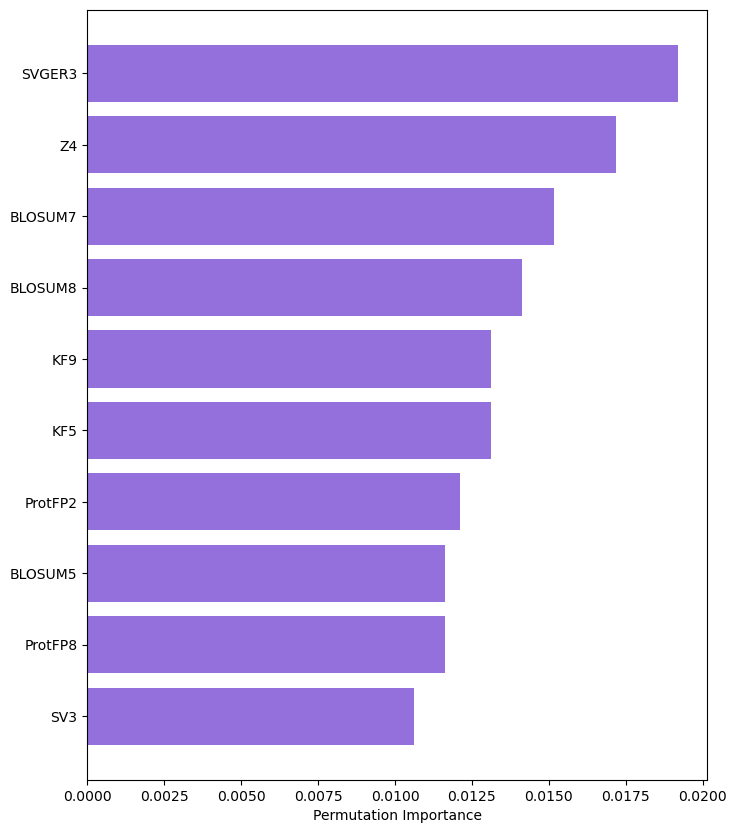

In [63]:
feature_imp(Data, scaler)

In [79]:
#bacteria='Staphylococcus aureus'
#bacteria='MRSA'
bacteria='Bacillus subtilis'
#bacteria='Escherichia coli'
#bacteria='Salmonella typhimurium'
#bacteria='Klebsiella pneumoniae'

In [82]:
data(bacteria)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Bacillus subtilis   BLOSUM1   BLOSUM2   BLOSUM3   BLOSUM4   BLOSUM5  \
1096                 1  0.246481 -0.039815 -0.089630  0.148148  0.292778   
2613                 1 -0.174000 -0.335000 -0.175000 -0.095000  0.155000   
759                  0  0.442500 -0.133500 -0.180500  0.174000 -0.143500   
2535                 1  0.482500  0.061667 -0.139286  0.009405  0.037857   
2599                 1 -0.153125 -0.436875 -0.681875 -0.451250  0.339375   
...                ...       ...       ...       ...       ...       ...   
2297                 0  0.168000 -0.209600  0.375200  0.197200  0.318400   
2116                 0  0.085652 -0.263043  0.015000  0.043043 -0.048043   
1178                 1 -0.442308 -0.303077 -0.691538 -0.542308  0.340769   
1091                 1 -0.242941 -0.094706  0.134706 -0.021765  0.734118   
2199                 1  0.096316 -0.327368  0.115789  0.185789  0.080263   

       BLOSUM6   BLOSUM7   BLOSUM8   BLOSUM9  ...     VHSE4     VHSE5  \
1096 -0.105556 -0.212037  0.091667  0.109630  ...  0.135370 -0.094444   
2613  0.391000  0.276000 -0.108000  0.121000  ... -0.060000  0.321000   
759  -0.159000  0.121000 -0.155000 -0.071000  ... -0.098500 -0.086000   
2535  0.249286  0.127381  0.204405  0.217381  ...  0.331905 -0.134167   
2599  0.288125  0.222500  0.186250 -0.140625  ...  0.092500  0.794375   
...        ...       ...       ...       ...  ...       ...       ...   
2297  0.101600  0.272400  0.056800  0.026000  ...  0.354800  0.175600   
2116  0.334783  0.151739  0.204783  0.069565  ...  0.131087  0.078261   
1178  0.240000  0.098462  0.100000 -0.194615  ... -0.065385  0.806923   
1091 -0.072353  0.116471  0.178824  0.046471  ...  0.310588  0.642941   
2199  0.297632 -0.057895 -0.414737  0.011316  ... -0.236579 -0.048947   

         VHSE6     VHSE7     VHSE8        Z1        Z2        Z3        Z4  \
1096  0.350370  0.032222 -0.076852  0.890370  0.168333  0.250370 -0.403148   
2613 -0.352000  0.278000 -0.242000 -0.582000 -0.820000 -0.841000 -0.195000   
759   0.043500  0.102000  0.516500  0.554500  0.211000  0.310000  0.071000   
2535 -0.103690  0.628571 -0.276905  0.973095 -0.415000 -0.430000 -0.376429   
2599 -0.465625  0.878750 -0.336875 -1.010000 -0.514375 -1.811875  0.240625   
...        ...       ...       ...       ...       ...       ...       ...   
2297  0.056000  0.258400 -0.056800  0.886000 -0.995200  0.281200  0.132800   
2116 -0.313478  0.531087 -0.279348  0.210217 -1.062826 -0.471957 -0.262174   
1178 -0.490000  0.592308 -0.349231 -1.759231 -0.054615 -1.714615  0.450000   
1091  0.477647  0.021176 -0.001765  0.467059  0.251765 -0.305882  0.795882   
2199 -0.095789 -0.034474 -0.175526  0.452632 -0.888947 -0.143684 -0.701579   

            Z5  
1096 -0.159074  
2613  0.323000  
759   0.649000  
2535  0.270000  
2599  0.531875  
...        ...  
2297 -0.257600  
2116 -0.025000  
1178  0.449231  
1091 -0.803529  
2199 -0.096842  

[1390 rows x 89 columns]

array([79, 37, 70, 29, 85, 20, 65, 51, 49, 18, 71, 34,  1, 54, 39, 42, 21,
       86, 32, 31, 58, 76, 30, 81,  0, 40, 22, 77, 11, 66, 62, 75, 43, 15,
        6, 41, 47, 36, 27, 46,  4, 73, 19, 17, 78, 12, 60, 44, 83, 80, 35,
       56,  9, 74, 55,  7, 26, 59, 68,  3, 50, 72, 33, 48, 14, 67, 10, 82,
        8, 16, 52, 63, 61, 53, 25, 38, 84, 24, 69, 57, 87, 45,  5, 28, 23,
       64,  2, 13], dtype=int64)

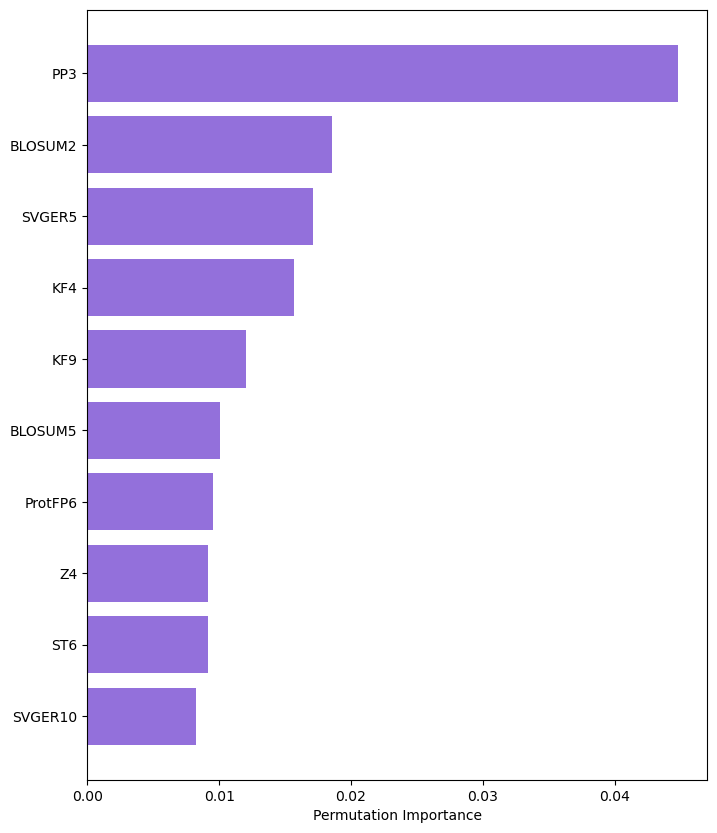

In [83]:
feature_imp(Data, scaler)

In [85]:
#bacteria='Staphylococcus aureus'
#bacteria='MRSA'
#bacteria='Bacillus subtilis'
bacteria='Escherichia coli'
#bacteria='Salmonella typhimurium'
#bacteria='Klebsiella pneumoniae'

In [86]:
data(bacteria)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Escherichia coli   BLOSUM1   BLOSUM2   BLOSUM3   BLOSUM4   BLOSUM5  \
1710                0 -0.230400 -0.476800 -0.240400  0.019200 -0.209200   
135                 0  0.280000 -0.608000  0.457000 -0.222000 -0.471000   
2398                0  0.154419  0.030233  0.133953  0.034651 -0.056977   
18                  0 -0.236250 -0.468125 -0.046875  0.057500 -0.253125   
631                 1  0.223750 -0.311250  0.094375  0.113750  0.181875   
...               ...       ...       ...       ...       ...       ...   
295                 0 -0.048101 -0.292025  0.163797 -0.058481 -0.050759   
2103                0 -0.003125 -0.252500  0.181250  0.116250  0.142500   
716                 1 -0.272857 -0.563571 -0.452143 -0.090714  0.597857   
2482                0 -0.578462 -0.603077 -0.286154 -0.042308 -0.212308   
724                 1 -0.482500 -0.595833 -0.161250  0.046667  0.017917   

       BLOSUM6   BLOSUM7   BLOSUM8   BLOSUM9  ...     VHSE4     VHSE5  \
1710  0.035200  0.287600  0.062800  0.183200  ... -0.511600  0.142000   
135  -0.226000  0.642000 -0.004000  0.191000  ... -0.025000 -0.093000   
2398  0.413256  0.313023  0.051860 -0.055349  ...  0.412093  0.046279   
18    0.415000  0.183125  0.224375  0.100625  ... -0.242500  0.046250   
631  -0.004375 -0.015000 -0.044375  0.060625  ... -0.018750 -0.016250   
...        ...       ...       ...       ...  ...       ...       ...   
295   0.237722  0.324177  0.172025  0.079620  ...  0.231519  0.043165   
2103  0.216875 -0.106875  0.123125 -0.216250  ...  0.069375 -0.026875   
716   0.034286  0.168571  0.175000 -0.120714  ... -0.209286  0.770000   
2482  0.182308  0.239231  0.070769  0.017692  ... -0.543846  0.211538   
724  -0.085833  0.130833 -0.194167  0.129167  ... -0.706667  0.255000   

         VHSE6     VHSE7     VHSE8        Z1        Z2        Z3        Z4  \
1710 -0.759200  0.300000  0.068000 -0.970000 -1.220000 -0.522800 -0.103600   
135  -1.070000  0.337000  0.650000 -0.488000 -1.696000  0.556000 -0.278000   
2398 -0.343023  0.444419 -0.529535  0.026512 -0.617442 -0.131628 -0.230698   
18   -0.726250  0.431875 -0.341250 -0.768125 -1.499375 -0.646875 -0.536875   
631   0.093125 -0.074375  0.080000  0.739375 -0.502500  0.284375 -0.486250   
...        ...       ...       ...       ...       ...       ...       ...   
295  -0.378354  0.199494 -0.185949 -0.263038 -1.165570  0.047848 -0.034430   
2103  0.083750  0.190625 -0.076875  0.511250 -0.352500 -0.296875 -0.172500   
716   0.173571  0.258571  0.259286  0.212143 -0.072857 -1.645000  0.525000   
2482 -0.946923  0.123077 -0.076154 -2.030769 -1.203846 -0.646154 -0.386923   
724  -0.489583 -0.187083  0.206250 -1.258333 -1.023750 -0.325833 -0.070833   

            Z5  
1710  0.449600  
135   0.933000  
2398  0.230465  
18    0.250000  
631   0.051250  
...        ...  
295  -0.084304  
2103 -0.275625  
716  -0.358571  
2482  0.549231  
724   0.163750  

[1618 rows x 89 columns]

array([55, 34, 14, 54, 76, 32, 19, 85, 59,  1, 15, 17, 42, 35, 47, 51, 30,
       39, 11, 65, 44, 82, 68, 70,  6, 53, 86,  3, 58, 72,  0, 10, 33, 12,
       79, 41, 16, 37, 84, 48, 81, 77, 78, 20,  2, 40, 18, 66, 29, 31, 74,
       75, 56, 62, 38, 83, 67, 52, 49, 73, 27, 22, 71, 69, 21, 50, 60, 24,
       46,  4, 43, 36, 64,  9, 25, 26, 23, 57, 61, 87, 45,  7, 63, 80, 28,
        5, 13,  8], dtype=int64)

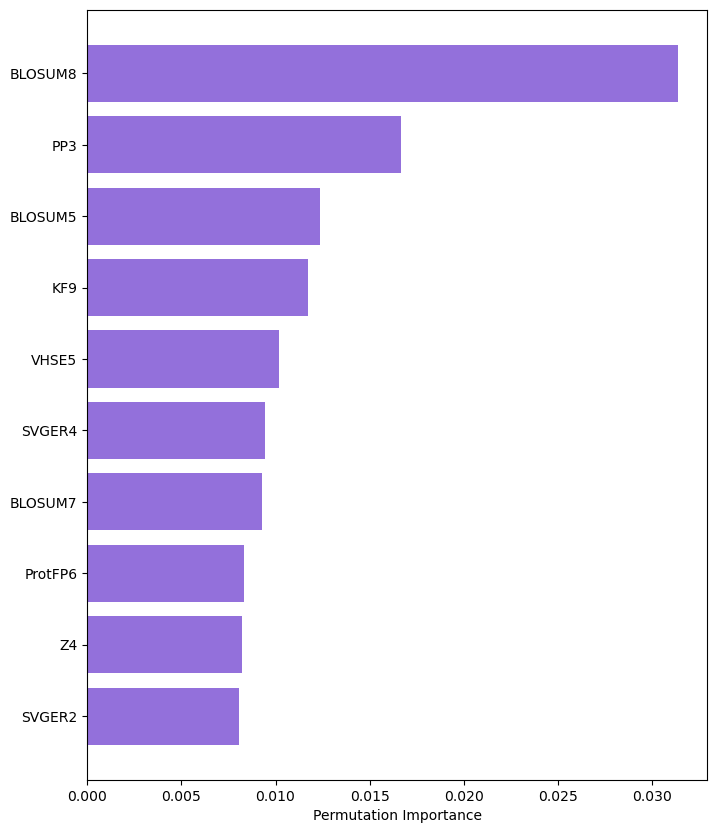

In [87]:
feature_imp(Data, scaler)

In [90]:
#bacteria='Staphylococcus aureus'
#bacteria='MRSA'
#bacteria='Bacillus subtilis'
#bacteria='Escherichia coli'
bacteria='Salmonella typhimurium'
#bacteria='Klebsiella pneumoniae'

In [91]:
data(bacteria)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Salmonella typhimurium   BLOSUM1   BLOSUM2   BLOSUM3   BLOSUM4   BLOSUM5  \
766                       1  0.097143  0.784286 -0.788571  1.215714  0.078571   
1298                      0 -0.078750 -0.466250 -0.517500 -0.367500  0.313750   
1759                      1  0.013750  0.231250 -0.503125 -0.503750  0.668125   
2644                      1 -0.056800 -0.227200  0.074800 -0.053200 -0.033600   
70                        0  0.247059 -0.065882  0.140588 -0.311176  0.251765   
...                     ...       ...       ...       ...       ...       ...   
685                       0  0.242083 -0.249375 -0.064792 -0.219583  0.245833   
1639                      1 -0.362308  0.642308  0.126923 -0.961538  0.134615   
500                       1  0.140000  0.318333 -0.172500 -0.434167  0.441667   
192                       1 -0.087500 -0.547500 -0.564167 -0.221667  0.375833   
2448                      1  0.283788 -0.089848  0.054545  0.124697  0.213182   

       BLOSUM6   BLOSUM7       BLOSUM8   BLOSUM9  ...     VHSE4     VHSE5  \
766  -0.484286  0.434286  2.973812e-18 -0.198571  ... -0.378571  0.450000   
1298  0.306250  0.244375  1.156250e-01 -0.000625  ...  0.009375  0.659375   
1759  0.244375  0.289375 -3.375000e-02 -0.200000  ...  0.519375  1.023750   
2644  0.430000  0.297600  1.368000e-01  0.130000  ...  0.122800  0.021600   
70    0.290588  0.415294  1.188235e-01  0.574706  ...  0.251176  0.597059   
...        ...       ...           ...       ...  ...       ...       ...   
685  -0.045625  0.065417 -1.875000e-03  0.099583  ...  0.001042  0.256250   
1639 -0.124615  0.055385 -1.330769e-01 -0.256154  ...  0.414615  0.817692   
500   0.280833  0.133333 -1.016667e-01  0.014167  ...  0.403333  0.761667   
192   0.206667  0.385833  1.008333e-01  0.142500  ... -0.318333  0.747500   
2448  0.035455  0.099394 -8.666667e-02  0.005606  ...  0.150606  0.020303   

         VHSE6     VHSE7     VHSE8        Z1        Z2        Z3        Z4  \
766   0.454286  0.618571  0.427143  0.652857  0.898571 -0.302857  2.545714   
1298 -0.461875  0.754375 -0.329375 -0.721250 -0.700625 -1.453750  0.096875   
1759  0.555625  0.472500  0.286875  0.440000  1.613125 -2.191875  1.349375   
2644 -0.648000  0.483600 -0.516400 -0.368000 -1.194000 -0.479600 -0.480000   
70   -0.198235  0.722941 -0.354706  0.381176 -0.522353 -0.465294  0.645882   
...        ...       ...       ...       ...       ...       ...       ...   
685   0.040000  0.070000  0.221250  0.545417 -0.152292 -0.374375  0.033125   
1639 -0.156154  0.026923  0.310769 -1.666923  1.845385 -0.657692  1.846154   
500   0.317500  0.389167 -0.136667  0.197500  1.201667 -0.910833  1.039167   
192  -0.137500  0.535000  0.195833  0.178333 -0.257500 -2.010000  0.463333   
2448  0.196364  0.064242  0.101212  0.782424 -0.167273  0.233788  0.036970   

            Z5  
766   0.138571  
1298  0.583125  
1759 -0.236875  
2644  0.285600  
70    0.357059  
...        ...  
685   0.094792  
1639 -0.197692  
500   0.100833  
192   0.232500  
2448  0.079545  

[820 rows x 89 columns]

array([38, 32, 57, 17, 66, 86, 10, 22,  2, 34, 39, 11,  0,  6, 52, 33, 65,
       48, 40, 74, 70, 78, 75, 67, 12, 41, 18,  7, 29, 77,  1, 49, 71, 19,
       72, 51, 56, 76, 83, 68, 84, 37, 62, 82, 14,  3, 79, 23, 58, 54, 47,
       15, 73, 20, 31, 69, 36, 44, 60, 63, 26,  9, 53, 46, 61, 59, 55, 35,
       85, 24, 81, 50, 25,  4, 80, 87, 21,  8,  5, 43, 16, 27, 42, 45, 30,
       64, 13, 28], dtype=int64)

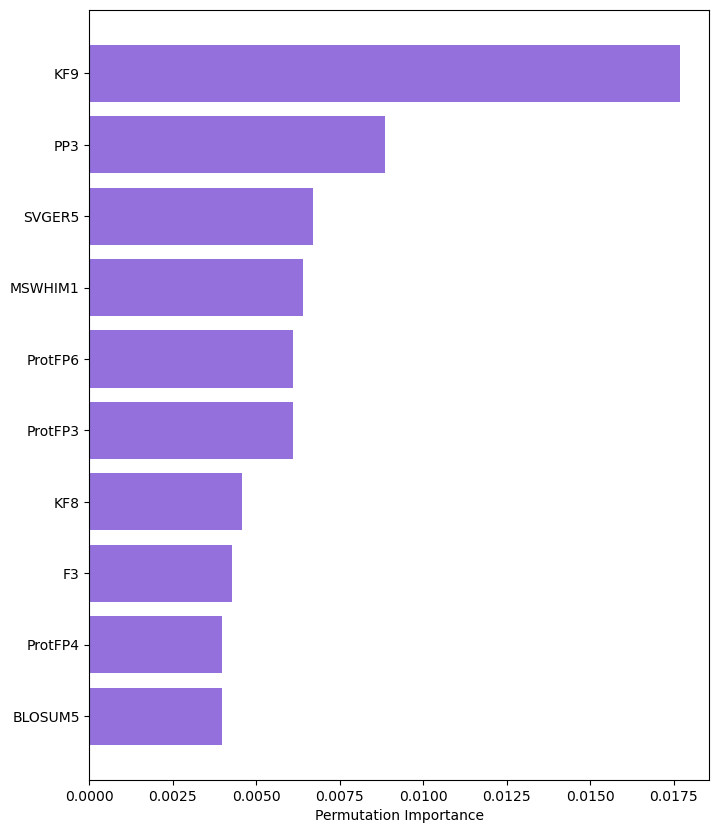

In [92]:
feature_imp(Data, scaler)

In [93]:
#bacteria='Staphylococcus aureus'
#bacteria='MRSA'
#bacteria='Bacillus subtilis'
#bacteria='Escherichia coli'
#bacteria='Salmonella typhimurium'
bacteria='Klebsiella pneumoniae'

In [94]:
data(bacteria)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Klebsiella pneumoniae   BLOSUM1   BLOSUM2   BLOSUM3   BLOSUM4   BLOSUM5  \
1595                     0 -0.069091  0.016364 -0.149545 -0.340000  0.153182   
2244                     0  0.095741  0.035000 -0.036481  0.030741  0.073519   
1853                     0 -0.568125 -0.268125 -0.095625  0.020000 -0.285625   
365                      0 -0.262500 -0.476250 -0.169583  0.084167  0.153333   
601                      0 -0.026522 -0.386522  0.095652  0.025652 -0.124783   
...                    ...       ...       ...       ...       ...       ...   
512                      0 -0.050625 -0.508750 -0.430000 -0.236250  0.183125   
337                      1 -0.337000  0.314000 -0.359500  0.212500 -0.068500   
2811                     0  0.103030 -0.451212  0.060000 -0.079091  0.174545   
349                      0  0.022692 -0.313462 -0.041923 -0.132308  0.004615   
2756                     0 -0.030000 -0.346471 -0.247647 -0.181765  0.060588   

       BLOSUM6   BLOSUM7   BLOSUM8   BLOSUM9  ...     VHSE4     VHSE5  \
1595  0.263636  0.132727 -0.013182  0.190909  ...  0.105909  0.475000   
2244  0.289630  0.130000 -0.151481  0.004074  ...  0.210000  0.159074   
1853  0.325000  0.316875  0.178750 -0.029375  ... -0.056875  0.130625   
365   0.033750  0.072083  0.009167  0.423750  ... -0.596250  0.159167   
601   0.507391  0.241739  0.001739  0.010870  ...  0.045217 -0.057826   
...        ...       ...       ...       ...  ...       ...       ...   
512   0.326250  0.180625  0.074375  0.053125  ... -0.153750  0.553125   
337   0.219000  0.084500 -0.026000 -0.031000  ...  0.095000  0.462500   
2811  0.317576  0.174242  0.052424  0.119091  ...  0.025758  0.117879   
349   0.329231  0.183846 -0.195769  0.024615  ... -0.067692  0.296538   
2756  0.304706  0.096471  0.047059  0.117647  ... -0.228235  0.314706   

         VHSE6     VHSE7     VHSE8        Z1        Z2        Z3        Z4  \
1595 -0.232273  0.256818 -0.355000 -0.486364 -0.249545 -0.748636  0.285000   
2244 -0.038148  0.247222 -0.290370  0.170370 -0.368704 -0.403333 -0.056852   
1853 -0.810000  0.177500 -0.255000 -1.960625 -1.071250 -0.371250 -0.333125   
365  -0.275833 -0.132083 -0.183333 -0.405417 -0.982500 -0.018750 -0.052083   
601  -0.588261  0.445217 -0.440870 -0.291304 -1.562174 -0.456957 -0.697826   
...        ...       ...       ...       ...       ...       ...       ...   
512  -0.348125  0.450000 -0.246250 -0.463125 -0.768750 -1.022500  0.226875   
337  -0.128500  0.120500 -0.360000 -1.102500  0.664500 -0.530000  0.108500   
2811 -0.345455  0.398182 -0.393030  0.186061 -1.327576 -0.373333 -0.391212   
349  -0.421923  0.318846 -0.135000 -0.335385 -0.862308 -0.663077 -0.214231   
2756 -0.498235  0.510588 -0.291765 -0.408235 -0.636471 -0.904706 -0.122941   

            Z5  
1595  0.029545  
2244 -0.031852  
1853  0.276250  
365  -0.009583  
601   0.317391  
...        ...  
512   0.269375  
337  -0.086000  
2811  0.244545  
349   0.310000  
2756  0.372941  

[726 rows x 89 columns]

array([58, 70, 55, 54, 20, 65, 74, 51, 77, 21,  1, 79, 18, 60, 40, 17, 49,
       48, 24, 46, 72, 33, 86, 10, 84, 73, 16, 69,  0, 11, 12, 53, 34, 35,
       52, 15,  3,  9, 62, 37,  6, 82, 85, 59, 43, 71, 78, 32, 25, 42, 44,
       63, 29, 66, 50, 80, 76, 13, 39, 14, 38, 22, 83, 75,  5, 68, 87, 41,
       30,  4,  7, 31, 56, 67, 61, 64, 45, 81, 19, 47, 57, 36,  2, 23, 26,
       27,  8, 28], dtype=int64)

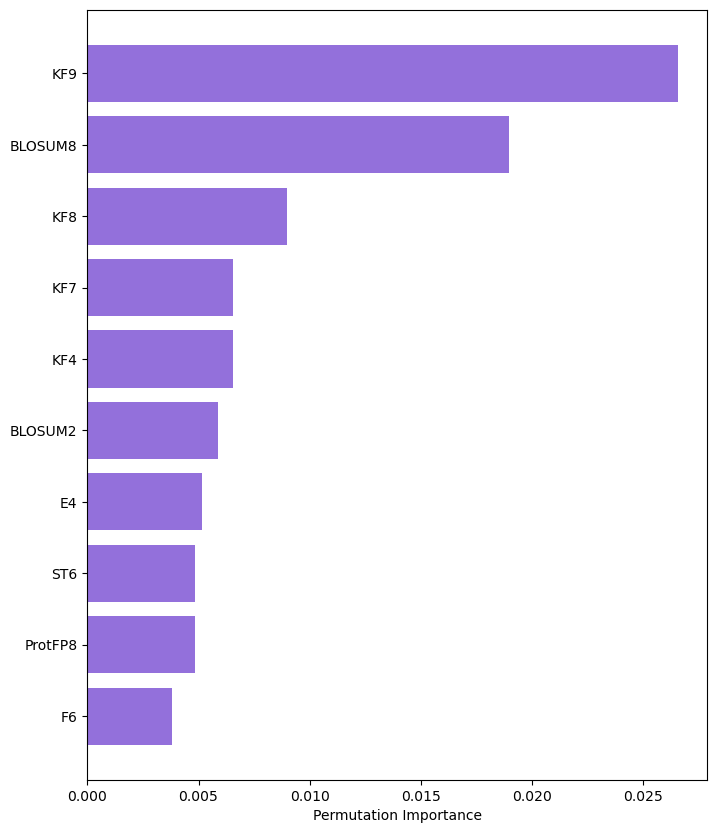

In [95]:
feature_imp(Data, scaler)